# Lecture 2-1: Medical Image Acquisition

## 0.- Initialize filesystem and libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from IPython.display import Image, display

## 1.- Introduction to Medical Images


**Medical imaging** is a part of modern healthcare that provides important information for diagnosis, treatment planning, and monitoring surgical interventions.

It produces **images that represent structures of the body or physiological functions** through the interaction of electromagnetic radiation or mechanical waves with tissues, organs and structures of the human body.

### 1.1. The Electromagnetic Spectrum

Most **medical images** are created by recording **how tissues and the internal structures react to certain types of electromagnetic radiation or**, in the case of ultrasounds, **mechanical waves**.

Electromagnetic radiation is made up of photons, and the **energy of a photon** is given by:

$$E = h\,\nu = h\dfrac{c}{\lambda}$$

where:

* $h$ is Planck's constant ($6.626 \times 10^{-34}\ \textit{J·s}$ or $4.136 \times 10^{-15}\textit{eV·s}$),
* $\nu$ is the frequency of the photon in Hertz ($Hz$),
* $c$ is the speed of the light in the vacuum ($c = 299792458\,m\,s^{-1}$),
* $\lambda$ is the wavelenght.

This means that the product of the wavelength and frequency is always constant ($c = \nu\, \lambda$).

1 $eV$ is the energy that a single electron acquires when moving through a potential of 1 $V$.

If $E$ is measured in $eV$ and the wavelength in $m$, this expression results in:

$$E = 1.24\cdot 10^{-6}\cdot \lambda^{-1}$$

which is useful to relate easily among $E$, $\lambda$ and $\nu$.


In [ ]:
4.136e-15*3e8

1.2408e-06


The different types of electromagnetic radiation used in medical imaging can be classified according to their frequencies:

* **Alternating Current** ($1 - 10^4 Hz$): used in _electrical impedance tomography_, though not frequently.
* **Radiofrequency** ($10^4 - 10^8 Hz$): used in **magnetic resonance imaging (MRI)**.
* **Microwaves** ($10^8 - 10^{12} Hz$): not widely used in medical imaging.
*	**Infrared** ($10^{12} - 7 \times 10^{14} Hz$): used in some medical applications like _near-infrared imaging_.
* **Visible Light** ($4.6 \times 10^{14} - 6.6 \times 10^{14} Hz$): used in _light microscopy_, _histological imaging_, _endoscopy_, and _optical coherence tomography_ (OCT).
* **Ultraviolet** ($4 \times 10^{14} - 10^{18} Hz$): important for _fluorescence imaging_. At these frequencies, photons can **ionize molecules**, potentially damaging biological tissue.
*	**X-rays** ($4.8 \times 10^{18} - 4.8 \times 10^{19} Hz$): one of the most important types of radiation for medical imaging, used in **radiography** and **computed tomography (CT)**.
* **Gamma rays** ($1.45 \times 10^{19} - 1.23 \times 10^{20} Hz$): $\gamma$ rays penetrate tissue easily, so they are used to produce images through the detection of this type of radiation (**scintigraphy**, **single photon emission computed tomography (SPECT)**, **positron emission tomography (PET)**), and for _radiation therapy_ (to treat cancer by destroying malignant tissue with high doses in the tumor).

A photon with an energy $\,\geq 15 eV$ is capable of ionization (**ionizing radiation**), which means that it has enough energy as to release electrons from an atom.


In [ ]:
ionizing_radiation_wavelength = 1.24e-6 / 15 # wavelength in m
ionizing_radiation_frequency = 3e8 / ionizing_radiation_wavelength # frequency in Hz
print(ionizing_radiation_wavelength) # 82.7e-9 m = 82.7 nm
print(ionizing_radiation_frequency) # 3.6e15 Hz = 3.6 PHz

8.266666666666667e-08
3629032258064516.0



That corresponds to **ultraviolet radiation, X-rays, and Gamma rays**, and is considered harmful for the human body.

In addition, the **difference between X-rays and gamma rays** lies not in their wavelength, but in the form in which radiation is generated: gamma rays are created in the nucleus of an atom, while X-rays are generated by electrons interacting in the electron cloud.



<img src="https://radiologykey.com/wp-content/uploads/2021/05/C2-FF1.gif" alt="Caption" width="800"><p style="text-align: center;">Figure 1: Electromagnetic spectrum, showing the equivalence between wavelength, frequency, and the energy of one photon. Source: <a href="https://radiologykey.com/radiation-and-the-atom/">Radiology Key.</a></p>

### 1.2. Medical Imaging Modalities

There are several **modalities of medical imaging**, that generate images of the body by applying either **electromagnetic radiation** (most of them) or mechanical waves (**ultrasounds**), and recording in the form of images how the internal structures react to them.

These modalities are usually classified based on the **type of information** they provide and the **physical principle** they use.

* **Projection radiography** and **fluoroscopy**:
  
  * **Projection radiography** is based on the **projection of planar X-ray onto the patient**, and is commonly used for routine checks, like chest X-rays to find pneumonia, broken bones, and other issues.
  
  * **Fluoroscopy** provides **continuous X-ray live moving images** displayed on a monitor, useful during procedures like heart treatments and surgeries.


* **Computed Tomography (CT)**:

  CT produces slice images, which are 2D **cross-sectional X-ray images** of the body. These slices represent specific measurements at various layers of the body.
  
  By stacking these 2D slices, a **3D volumetric image** can be constructed, allowing for detailed visualization of internal structures.


* **Magnetic Resonance Imaging (MRI)**:

  Uses **magnets and radio waves** to produce detailed images of the body's internal parts. This interaction varies with tissue type and molecular composition, producing **detailed images of soft tissues and organs** (brain, muscles, ...) and does not use radiation.


* **Ultrasounds (US)**:

  It is based on **reflecions of high-frequency sound waves to create real-time images** of the inside of the body.
  
  It is commonly used in pregnancy to monitor the baby, in cardiology to check heart function, and in emergency medicine for quick diagnosis of abdominal issues.


* **Nuclear Medicine Imaging**:

  Uses small amounts of radioactive materials to **measure the distribution of radioactive tracer materials in the blood**.
  
  This technique includes Positron Emission Tomography (PET) and Single Photon Emission Tomography (SPECT) scans, which **provide information about metabolic activity and organ function** to monitor and detect diseases like cancer and heart conditions at an early stage.


* **Endoscopy**:

  Uses a flexible tube with a camera (endoscope) to **transmit real-time images** to a monitor, allowing physicians to **examine internal organs and structures**.
  
  Although **endoscopy** provides visual information about the internal structures of the body, it **differs** fundamentally from the prior techniques.
  
  **Traditional medical imaging techniques** create images of the body's internal structures **using various forms of energy** (e.g., X-rays, magnetic fields, sound waves, or radioactive tracers) and **specialized equipment** to capture these images.
  
  In contrast, **endoscopy** relies on **direct visualization** through a camera. Therefore, it is classified as a clinical procedure rather than a medical imaging technique.


* **Light Microscopy**:

  Uses **visible light** to illuminate samples and magnify them through lenses to view small structures like **cells and tissues**.
  
  It has applications in histology for examining tissue sections to study their structure and **identify abnormalities such as cancer**.

  
* **Hyperspectral Imaging (HSI)**:
  
  It is a non-invasive and non-contact skin technique that **combines imaging and spectroscopy**.
  
  HSI is based on obtaining **spectral information over 30 channels (images) in different wavelengths**, which allows capturing complex light-tissue interactions.
  
  It provides diagnostic information about the tissue physiology, morphology, and composition. Its applications include oxygenation and blood circulation efficiency, open wound and burn wound diagnostics, cancer identification, blood circulation problems related to diabetes, and image-guided surgery [1].

[1]: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3895860/

### 1.3. Anatomical Planes and Orientations

Medical imaging usually are **2D images taken from a 3D body**, so **three main planes or cross-sections** are defined with respect to the patient. They receive specific names, making it easier to talk about medical images.

| Plane | Divides the Body Into | Orientation | Common Uses |
|---|---|---|---|
| **Sagittal (longitudinal)** | Left and right parts | Vertical, parallel to the midline | Brain, spinal cord, internal organs|
| **Coronal (frontal)** | Anterior (front) and <br> posterior (back) parts | Vertical, parallel to the face | Brain, thoracic, abdominal imaging |
| **Transverse (axial)** | Superior (upper) and <br> inferior (lower) parts | Horizontal, perpendicular to <br> sagittal and coronal planes | CT and MRI scans |

According to **how each plane divides the body** in two halves, the anatomical orientations receive the names **superior, inferior, anterior, posterior, right and left**.

In addition, orientation in medical images are **named according to the patient's perspective**. For example, in a radiography, the left side of the image corresponds to the right anatomical side of the patient.

<img src="https://www.researchgate.net/profile/Kiao-Inthavong/publication/303653621/figure/fig1/AS:368693965017092@1464914899925/Anatomical-planes-and-position-definition-The-axial-plane-also-called-transverse-plane.png" alt="Caption" width="350">
<p style="text-align: center;">Figure 2: Human anatomical planes. Source: <a href="https://www.researchgate.net/figure/Anatomical-planes-and-position-definition-The-axial-plane-also-called-transverse-plane_fig1_303653621">ResearchGate.</a></p>

### 1.4. Annotations in Medical Images

In medical imaging, annotations provide important information about the **acquisition process**, which influences how the image is interpreted.

Common annotations in medical imaging include details about the **anatomical plane** and the **side of the body** where the imaging was performed. This **affect the appearance** of anatomical structures and **allow** radiologists and clinicians **to interpret images correctly**.

For example, an abnormal finding on a specific view might be less concerning if the same finding is not visible in another view, suggesting it might be an artifact or outside the area of concern.

Common annotations are the following:

* **PA (Posterior-Anterior)**: in a PA view, X-rays enter the body from the back (posterior) and exit through the front (anterior). This is common in chest X-rays, where the patient stands facing the detector with their back to the X-ray source.

* **AP (Anterior-Posterior)**: opposite to PA view, X-rays enter through the front of the body and exit through the back. This view is often used when patients are unable to stand (e.g., in a hospital bed).

* **Lateral**: a lateral view captures an image with the X-rays passing from one side of the body to the other, providing additional perspective on the depth and location of structures seen in PA or AP images.

* **Oblique**: are taken at an angle to the standard PA/AP or lateral positions to allow better visualization of certain anatomical structures or pathological conditions.

* **Axial**: in CT and MRI, axial views refer to images taken in a plane that cuts horizontally through the body, providing a cross-sectional image from top to bottom.

### 1.5. Dimensionality in Medical Imaging

Medical images can be categorized into **two varieties** according to their dimensions:

* **Projection images** show a projection of a physical parameter of the 3D human body onto a 2D image (e.g., radiography).

* **Slice images** show how a specific measurement (like density or signal strength) varies across a 2D slice of the body, where each pixel directly represents a specific measured value at that location. Slice images are usually stacked to form a volume (e.g., CT scans, MRI).

These images offer information that is often not possible to obtain through physical examination.





### 1.6. Medical Imaging Sensors and Spatial Resolution

Rather than capturing individual photons or electrons as in **CCD** (Charge-Coupled Device) / **CMOS** (Complementary Metal Oxide Semiconductor) sensors, **medical imaging systems convert radiation or waves into electrical signals** using different physic principles, which are then processed to create images that represent specific **anatomical or functional details** with a certain real-world resolution.

**Spatial resolution** refers to the smallest distinguishable detail within the image and is usually defined **in terms of the physical size** each picture or volume element represents.

Spatial resolution in medical images is commonly **sub-millimeter and a few millimeters for 2D and 3D measures**, respectively, except in nuclear imaging, where the resolution is lower.

The **sensors** used in medical imaging, according to the modality are the following:

* **X-ray (radiographs) and CT scanners**: use detector arrays that convert X-ray radiation into electrical signals.
  
  These detectors measure the **intensity of the transmitted X-rays passing across different tissue densities**, and this data is converted into an image.

* **MRI scanners**: detect **radiofrequency (RF) signals** emitted by hydrogen nuclei in the body's water molecules after being excited by a magnetic field.

  The **strength and frequency** of these signals are converted into an image, with resolution determined by factors like magnetic field strength, gradient coil precision, and the RF pulse sequences used.

* **Ultrasound**: uses piezoelectric crystals in the transducer to **convert sound waves into electrical signals**.

  The resolution is influenced by the **frequency of the sound waves**, with higher frequencies providing better resolution but less penetration depth.

* **Nuclear imaging**: **detect gamma radiation emitted by radiotracers within the body** using scintillation crystals coupled with photomultiplier tubes or semiconductor detectors.

  The resolution is determined by factors like detector sensitivity, the energy of the gamma rays, and the reconstruction algorithms used.

### 1.7 Comparision of medical imaging modalities

| **Criteria**              | **Spatial Resolution**                     | **Availability**                                        | **Cost**                                   | **Radiation Exposure**                             |
|---------------------------|--------------------------------------------|--------------------------------------------------------|--------------------------------------------|----------------------------------------------------|
| **Radiography** | Moderate to high <br> (0.1-0.5 mm) | Widely available, quick | Low | Low to moderate <br> (depends on the <br> number of images) |
| **CT (Computed Tomography)** | High (0.5-1 mm) | Available in most hospitals | Moderate to high | Higher than X-rays |
| **MRI (Magnetic Resonance Imaging)** | High (0.5-1 mm) | Available (less than CT ) | High | None |
| **Ultrasound** | Low to moderate <br> (1-2 mm) | Widely available, portable | Low to moderate | None |
| **Nuclear Medicine** | Low (5-10 mm) | Limited (specialized centers) | High to very high | High (depends on <br> the procedure and <br> radioisotope) |

## 2.- Projection Radiography

**Projection radiography**, commonly known as **X-ray imaging**, is a used diagnostic technique that **employs X-rays to create images of the body's internal structures**.

It was the first technique that allowed insight into the human body. **When radiation interacts a photosensitive surface, it produces an image**. The shorter the wavelength, the higher the frequency, and the greater the ability to penetrate objects.

By **passing X-rays through the body and capturing the resulting image** on a detector or film, this method provides clear views of bones, tissues, and organs.

<img src="https://upload.wikimedia.org/wikipedia/commons/d/db/Projectional_radiography_components.jpg" alt="Human anatomical planes and orientations" width="500">
<p style="text-align: center;">Figure 3: Projectional radiography or planar X-rays. Source: <a href="https://en.wikipedia.org/wiki/Projectional_radiography">Wikipedia.</a></p>


<img src="https://upload.wikimedia.org/wikipedia/commons/a/a1/Normal_posteroanterior_%28PA%29_chest_radiograph_%28X-ray%29.jpg" alt="Human anatomical planes and orientations" width="300">
<p style="text-align: center;">Figure 4: Normal chest radiography. Source: <a href="https://en.wikipedia.org/wiki/Projectional_radiography">Wikipedia.</a></p>


### 2.1. X-ray Generation

X-rays were discovered in 1895 by Wilhelm Röntgen, as an unknown type of short wave **electromagnetic radiation emitted by a cathode ray tube which could easily penetrate many materials** except lead. This radiation was not reflected, refracted, diffracted or deflected by electrical fields.

**Atoms** are made up of a **nucleus** (containing protons and neutrons) and **electrons** that orbit the nucleus in different energy levels or shells. Electrons are arranged in different **energy levels** around the nucleus, and the outermost electrons are called valence electrons.

**X-rays are generated as excess energy from electrons** in the material of a cathode ray tube (CRT) when heating the cathode. **High-energy electrons in the cathode** are **released and travel** accelerated **toward the anode** (thermionic emission).


The **X-ray spectrum** consist of **two types of radiation**:

* **Characteristic X-radiation** (_monochromatic radiation_):

  If the **incoming electron** has enough energy, it can knock out an **inner electron** from its orbit in the target material, in a process called **ionization**.

  An **electron from a higher energy level** (outer orbital) will **fall down** to fill the empty spot, **releasing energy in the form of X-rays**.
  
  This **energy** is specific (**characteristic**) to the **material** because it depends on the energy differences between electron shells of that material.

<img src="https://physicsopenlab.org/wp-content/uploads/2017/08/graph-11.png" alt="Caption" width="400">
<p style="text-align: center;">Figure 5: Characteristic radiation and bremsstrahlung in X-ray spectrum. Source: <a href="https://physicsopenlab.org/2017/08/02/bremsstrahlung-radiation/">PhysicsOpenLab.</a></p>

* **Bremsstrahlung** (_braking radiation_):

  When an **incoming electron** avoids the orbital electrons and **passes sufficiently close to the nucleus**, it is **slowed down and deviated** from its course, changing its frequency and leaving it with reduced kinetic energy in a different direction.
  
  This **loss in kinetic energy is released as an X-ray photon**. The energy distribution is **continuous**, as it **depends on how much the electron has been slowed down** (how close it passes the nucleus).

<img src="https://physicsopenlab.org/wp-content/uploads/2017/08/B9780323084956000014_f001-015-9780323084956.jpg" alt="Caption" width="400">
<p style="text-align: center;">Figure 6: High-energy and low-energy bremsstrahlung x-ray. Source: <a href="https://physicsopenlab.org/2017/08/02/bremsstrahlung-radiation/">PhysicsOpenLab.</a></p>


As the **kinetic energy** of the electrons is **increased**, both the **intensity** (the number of X-ray photons) and the **energy** (related to the ability to the X-ray to penetrate tissue and solid materials) of the radiation **are increased**.

Normally, the percentage of **kinetic energy** that is **used for the production of X-radiation** is very low, around 1%. The rest (99%) is converted to **heat**.








### 2.2. X-ray Interaction

There are two basic mecanisms by which **X-rays interact with matter**: the photoelectric effect and the Compton effect.

* **Photoelectric effect**:

	It occurs when an **X-ray photon interacts with an atom and is completely absorbed**, **transferring** all its **energy** to an electron. This **electron** is then **ejected** from the atom as a photoelectron, and **the atom becomes ionized**.
  
  The **energy of the ejected electron** is equal to the energy of the incident X-ray photon minus the binding energy of the electron.

  This mechanism is relevant at **lower photon energies** and contributes to **image contrast**.

* **Compton effect**:

	The Compton effect (or **Compton scattering**) occurs when an **X-ray photon collides** with a **loosely bound or free electron**.
  
  The **photon transfers** some of its **energy to the electron**, which is **ejected**, and the photon is **scattered** in a different direction with reduced energy.
  
  This effect is significant at **higher photon energies**. The amount of energy lost by the photon depends on the angle of scattering.

  It contributes to **image noise** in X-ray imaging by scattering X-ray photons, which can **reduce image contrast**.

<img src="https://www.researchgate.net/profile/Pratama-Guntoro/publication/331787454/figure/fig1/AS:738063869300736@1552979547567/Interaction-of-X-ray-photons-to-the-subjected-atom-showing-a-photoelectric.jpg" alt="Caption" width="700"><p style="text-align: center;">Figure 7: Cross-section of an X-ray tube. Source: <a href="https://www.researchgate.net/publication/331787454_X-ray_Microcomputed_Tomography_CT_for_Mineral_Characterization_A_Review_of_Data_Analysis_Methods">RadiologyKey.</a></p>

### 2.3. The X-ray Tube

An **X-ray tube** consists of a **vacuum tube**, with a **cathode** (which is **heated** at 2700K or more for electron production) and an **anode**.

<img src="https://radiologykey.com/wp-content/uploads/2016/02/B9780323069748100050_f05-03-9780323069748.jpg" alt="Caption" width="400"><p style="text-align: center;">Figure 8: Cross-section of an X-ray tube. Source: <a href="https://radiologykey.com/the-x-ray-tube-2/">RadiologyKey.</a></p>

The **cathode** is **heated** only for the **short exposure time** of the X-ray image (evaporation of the cathode material occurs if time is too long).

The **free electrons** are then **accelerated towards the anode** by the high voltage applied (**tube potential**). The **impact** of the electrons **in the anode** also **heats** it, so rotating anodes are used to better distribute the thermal energy.

When hitting the anode, the **kinetic energy** of the electrons **is converted to electromagnetic radiation** (X-radiation).

<img src="https://radiologykey.com/wp-content/uploads/2016/02/B9780323069748100050_f05-01-9780323069748.jpg" alt="Caption" width="400"><p style="text-align: center;">Figure 9: Photograph of an X-ray tube. Source: <a href="https://radiologykey.com/the-x-ray-tube-2/">RadiologyKey.</a></p>

To narrow the beam, a **collimator** is used. It consists of two lead shutters that the radiologist can adjust to **control the angle** at which the X-rays beam exits.

The **number of electrons** and the **energy of the photons** are controlled, respectively, by the **current** supplied to the cathode (in milliampere by second, $mA·s$, which is a measure of the total electrical charge that has passed through the tube during the exposure time), and the **voltage** between anode and cathode (in kilovolts, $kV$, around $50-120 kV$).

The **quantity** and **quality** of X-ray radiation produced by an X-ray tube are influenced by:

* **Tube characteristics**: the tube design and the anode material (different materials have distinct atomic numbers and properties, affecting the **efficiency** of X-ray production and the **shape** of the x-ray **spectrum** of the emitted X-rays).

* **Operational parameters**, such as the **exposure time** and the **voltage difference** between cathode and anode (it influences the **energy** of the X-rays produced, with higher voltages resulting in X-rays with higher energy (shorter wavelength) and greater penetrating power).

A **high-quality tube** has a higher ratio of high energy radiation and of monochrome radiation, which means that the **scattering** effect is reduced, a lower **dose** on the patient is then required, and usually produces better images.

The X-rays are directed towards an object (patient). Behind it, a **film** or **digital detector** inside a cassette is **sensitive to the radiation** that passes through the object, forming a grayscale image.

The **film**, that traditionally had to be processed with chemnicals, has been replaced with **digital cassettes** (with photosensitive devices), which are processed by an electronic reader.


### 2.4. Exposure and Dose


X-ray uses **ionizing radiation**, which can potentially **damage or alter cellular structures**.

Prolonged or repeated **exposure to ionizing radiation increases the risk of developing cancer**, as the DNA in cells may be altered by the radiation.

So, the concept of **exposure** and **dose** are important in X-rays.

* **Exposure** refers to the amount of X-ray radiation per unit volume of air. It measures the ionization **produced in air** by X-rays and is typically expressed in units of _Roentgen_ ($R$).

* **Absorbed dose** represents the **amount of energy from ionizing radiation** absorbed per unit mass of a material or tissue. It is measured in units of Gray ($Gy$).

  It is calculated by multiplying the exposure by the f-factor.

*	**F-factor** (or _conversion factor_): converts exposure to absorbed dose in a **specific material**, such as tissue.

  It links exposure to absorbed dose, **accounting for the properties of the tissue and the energy of the X-rays**.
  
  It helps in **determining the actual radiation dose absorbed** by the body based on the measured exposure. A high f-factor means that for a given amount of X-ray exposure, a larger dose of radiation is absorbed by the tissue (as in bones).

*	**Radiation weighting factor ($w_R$)**: different types of radiation cause different biological damage, even if the absorbed dose is the same. This effect is quantified by this value.

* **Equivalent dose**: accounts for the **biological effect of radiation**, and is measured in _Sieverts_ ($Sv$).

  It provides a way to **compare the biological risk of different types of radiation exposure**, since **each type of radiation** has a different radiation weighting factor.
  
  It is calculated by multiplying the absorbed dose by the radiation weighting factor.







### 2.5. Attenuation

The absorption of the X-rays is known as **attenuation**, which is the process where a part of the X-rays does not reach the film, either because they have been **absorbed** by the object or because they have been **scattered**.

As **X-rays pass through different tissues**, they are **absorbed to varying degrees** depending on the tissue's density and atomic number.

Attenuation of X-rays follows the **Beer-Lambert law**, which describes how the intensity of any electromagnetic radiation decreases exponentially as it travels through an absorbing medium:

$$I = I_0 \cdot e^{-\mu s}$$

where:

* $I$ is the intensity of the transmitted radiation after it passes through the material,
* $I_0$ is the initial intensity of the radiation before it enters the material,
* $\mu$ is the linear attenuation coefficient of the material, which represents how strongly the material attenuates the radiation,
* $s$ is the thickness of the material that the radiation passes through.

The **more density** an object has, the **more radiation** it will absorb.Materials with **higher values of $\mu$** (such as dense materials like bone or metal) will cause **greater attenuation** compared to materials with lower $\mu$ values (such as soft tissues or air).

**Four basic densities** can be defined for the human body: air, fat, soft tissue, bone/metal, and water is taken as **reference**, each with their own properties of density and attenuation, **related to the gray level** shown in the image.

| Material    | Density      | Intensity  | Attenuation  |
|-------------|--------------|------------|--------------|
| Air         | Very low     | Black      | Minimal (<0) |
| Fat         | Low          | Dark gray  |              |
| (Water)     | (Reference)  | Gray       | 0            |
| Soft tissue | Intermediate | Light gray |              |
| Bone        | High         | White      | Maximum (>0) |

<img src="https://connect.springerpub.com/binary/sgrworks/c03c4093fab47195/6231291d8754d7d58bc65b0b4567bac7059736019cad2d12760df0905d48db3e/9780826131270_fig1_5.png" alt="Caption" width="300"><p style="text-align: center;">Figure 10: Four densities on X-ray images. Source: <a href="https://connect.springerpub.com/content/book/978-0-8261-3127-0/part/part01/chapter/ch01">Medical Imaging for the Health Care Provider, Chapter 1.</a></p>

### 2.6. X-ray Image Analysis

**Absorption** occurs through processes such as the photoelectric effect and Compton scattering, which **affect the amount of X-ray energy reaching the detector**.

The **X-rays that pass through** the object are **detected by either a film or a digital detector**. The film is chemically processed or the digital signals are computer-processed to create an **image** that displays varying **shades of gray**, reflecting the **X-ray absorption** characteristics of the **tissues**, which are a function of the **density** of those objects.

The **denser** an object is, the **larger** value of $\mu$, the **more radiation** it will **absorb**, causing **greater attenuation** of the X-rays, and, as a result, the **lighter** the structure will appear on the image (and vice versa).

<img src="https://prod-images-static.radiopaedia.org/images/157210/332aa0c67cb2e035e372c7cb3ceca2_big_gallery.jpg" alt="Caption" width="350"><p style="text-align: center;">Figure 11: Normal chest X-ray image. Source: <a href="https://radiopaedia.org/articles/normal-chest-imaging-examples">Case courtesy of Frank Gaillard, <a href="https://radiopaedia.org/?lang=us">Radiopaedia.org</a>. From the case <a href="https://radiopaedia.org/cases/8090?lang=us">rID: 8090</a>.</a></p>










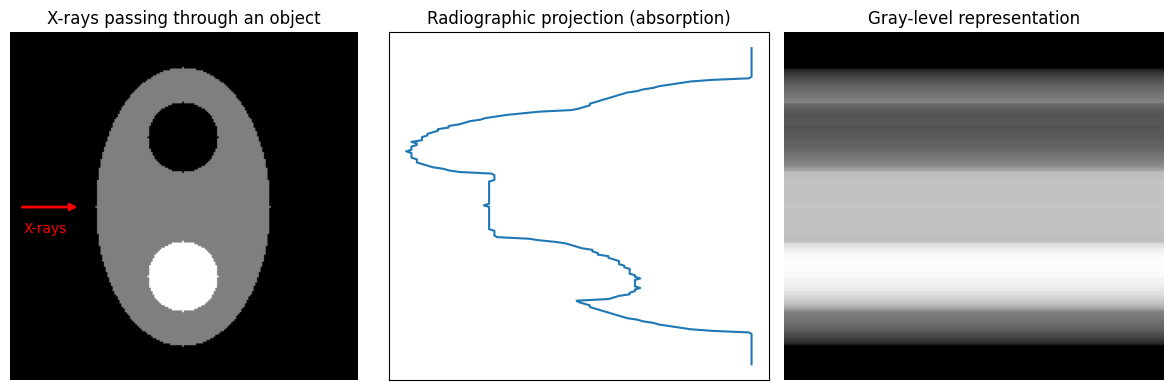

Figure 12: Radiadiation projection of a beam of X-rays passing through structures of different density (lighter colors means higher densities on the left image and higher attenuation on the right image).

In [ ]:
image_path = '/content/drive/MyDrive/PIM/Images/X-ray_projection.png'
display(Image(filename=image_path, width=800))
caption = '<p style="text-align: left;">Figure 12: Radiadiation projection of a beam of X-rays passing through structures of different density (lighter colors means higher densities on the left image and higher attenuation on the right image).</p>'
display({'text/html': caption}, raw=True)

#### **Spatial resolution**


**Spatial resolution** is the ability of an imaging modality to **distinguish between two adjacent structures** as separate entities. It is expressed in line pairs per millimeter (lp/mm). Human eyes can differentiate a spatial resolution of about 5 lp/mm.

The **lack of spatial resolution** results in image **blur**, with poor defined edges. Patient movement during image capture may reduce spatial resolution.

As for the **resolution of detectors**, **screen film** systems offer excellent spatial resolution, while **electronic detectors** are limited by pixel size.

Resolutions for different X-ray imaging modalities range from 10-15 lm/mm and 8-12 lp/mm for film-screen mammography and radiography, respectively, to 5-10 lp/mm and around 4 lp/mm for digital mammography and radiography [2].

Radiographs have **high spatial resolution**, compared to other modalities such as ultrasounds of nuclear imaging.

However, as **projections**, they cannot accurately correlate brightness with specific tissue types, and distance measurements are limited. In addition, **structures can obscure one another in projections**, complicating the interpretation of complex shapes.

So, in the overall, the resolution is considered **lower than CT or MRI**, which obtain slice images and allow to differentiate internal structures with more detail.

[2]: https://radiopaedia.org/articles/spatial-resolution

#### **Factors that affect image quality and interpretation**


There exists some factors related to the process of generating an X-ray image that can affect the accuracy with which the radiation is recorded and create artifacts which difficult the interpretation.

**Nonintentional factors**

Some physical or geometric factors can affect a radiological image, resulting in thickness, motion, scatter magnification and distortion:

* **Magnification** of the image depends on the **distance of the object to the film**. If this distance is not appropriate, a **zoom effect** will appear. The farther away of an object is from the film, the greater the magnification of that object. Magnification **reduces the sharpness** of the image.

<img src="https://connect.springerpub.com/binary/sgrworks/de27c82bbe7ff3a9/72ebfb0de879a50a3c22da243c08d437303734db90902b2a03f501ffb70fdcdf/9780826131270_fig1_10.png" alt="Caption" width="500"><p style="text-align: center;">Figure 13: Magnification effect on X-ray images. Source: <a href="https://connect.springerpub.com/content/book/978-0-8261-3127-0/part/part01/chapter/ch01">Medical Imaging for the Health Care Provider, Chapter 1.</a></p>

* The **thickness** of the objects and its **physical density** affect the attenuation of the rays that pass through them. **The thicker the object, the more radiation is required** to penetrate it. For that reason, it is important to **select the appropriate dose** of radiation **based on the thickness** of the object. Otherwise, it will result in an under- or overpenetrated image (reduced contrast), with structures that may be difficult to visualize (darker or lighter, respectively).

* **Motion artifacts** occur when the patient moves during X-ray exposure, and can result in **blurry images**. When an object moves, the rays are absorbed at different rates, making the image appear blurry. This can be attenuated by reducing exposure times.

<img src="https://connect.springerpub.com/binary/sgrworks/eceb1a7b386ef4d3/82e58f55c00e3601fbd68ee60a6bb9d3a56ebfd6eddbb35c4a328c9e2e81c723/9780826131270_fig1_8.png" alt="Caption" width="300"><p style="text-align: center;">Figure 14: Blurry image caused by motion. Source: <a href="https://connect.springerpub.com/content/book/978-0-8261-3127-0/part/part01/chapter/ch01">Medical Imaging for the Health Care Provider, Chapter 1.</a></p>



* **Metallic artifacts** are caused by the presence of metal objects within the imaging field, such as dental fillings, implants, or jewelry. These objects appear as bright or dark streaks emanating from the metal, known as “streak” artifacts.

* **Scatter radiation artifacts** are caused by deflection of the radiation beam. Scatter radiation may **reach the film at incorrect angles** that make the image appear **foggy**. A solution for this is using a grid moving up and down, which reduces scatter.

<img src="https://connect.springerpub.com/binary/sgrworks/1538a8401ea78561/22b17611fe4840683a291eb5a568cc1226928f1e57ccba294c540ba74ac70688/9780826131270_fig1_9.png" alt="Caption" width="500"><p style="text-align: center;">Figure 15: Scattering of X-rays, causing a foggy image. Source: <a href="https://connect.springerpub.com/content/book/978-0-8261-3127-0/part/part01/chapter/ch01">Medical Imaging for the Health Care Provider, Chapter 1.</a></p>

<!--
<img src="http://pd.chem.ucl.ac.uk/pdnn/diff1/manye.gif" alt="Caption" width="600"><p style="text-align: center;">Figure 15: Scattering of X-rays in the photographic film. Source: <a href="http://pd.chem.ucl.ac.uk/pdnn/diff1/scaten.htm">School of Crystallography, Birkbeck College, University of London.</a></p>
-->


**Intentional factors**

These refer to **alterations or modifications** of the image generation in order to achieve an **easier visualization**.

Typically, some images are generated after using a **contrast material** (e.g., barium), which **reduces attenuation and increases intensity**. This allows to examine structures that typically would not be seen on a normal radiograph.

For example, **angiography** uses water-soluble contrast injected to **highlight the circulatory flow** within an organ.

<img src="https://connect.springerpub.com/binary/sgrworks/9198288f8939cb02/c5d0f9ad82dc65631af1529d818da8d4f8127b9d00ba88fec4473fe85f138080/9780826131270_fig1_12.png" alt="Caption" width="300"><p style="text-align: center;">Figure 16: Contrasted study showing the small airways. Source: <a href="https://connect.springerpub.com/content/book/978-0-8261-3127-0/part/part01/chapter/ch01">Medical Imaging for the Health Care Provider, Chapter 1.</a></p>



### 2.7. Specific X-ray Imaging Techniques

Apart from conventional (planar) radiography, other specific types of X-ray imaging are commonly used:



#### **Fluoroscopy**

Uses a **continuous stream of X-rays** to visualize **moving or changing objects**, creating **real-time moving images** (often used with contrast agents for better visualization).

In this technique, X-rays are turned into visible light using a **fluorescent screen**. It is used either for diagnosis or surgical interventions (for example, pacemaker implants).

When it is **applied to imaging the vascular system**, it is called **angiography**, to show anatomy with blood vessels enhanced through a contrast agent. This is applied by a catheter and guided to the location to be imaged (brain, heart, ...).

For digital images, it is possible to **subtract an image made prior to applying the contast agent**, thus **enhancing vessels** mucho more compared to angiography. This technique is referred to as **digital subtraction angiography (DSA)**.

<img src="https://www.stroke-manual.com/wp-content/uploads/2021/05/Digital-subtraction-angiography-DSA.jpg" alt="Caption" width="500"><p style="text-align: center;">Figure 17: Digital subtraction angiography (DSA) image created by subtracting the first image (mask) from images after injected contrast agent. Source: <a href="https://www.stroke-manual.com/digital-subtraction-angiography-dsa/">www.stroke-manual.com.</a></p>




#### **Mammography**

The goal of **mammography** is to **detect small lesions** in the female breast, which usually require **much higher image quality than normal X-ray imaging** (contrast and spatial resolution).

Being a specific part of the anatomy, mammography uses X-ray with characteristic **low energy radiation** (around 17-19 keV) to **reduce scattering** and **increase contrast** to detect subtle differences on tissues.

Specifically used for breast imaging, mammography helps **detect breast cancer** by capturing X-ray images of breast tissue.

## 3.- Computed Tomography (CT)

### 3.1. Introduction to CT

**Tomography** is an imaging technique that consists of representing different **slices or sections of an object**.

A **Computed Tomography (CT)** image is obtained by using an **X-ray fan beam** that penetrates a **slice** of the patient. A **detector measures the intensity of the residual beam after it has passed through the body**, recording how much the beam is attenuated.

<img src="https://upload.wikimedia.org/wikipedia/commons/d/d2/Drawing_of_CT_fan_beam_%28left%29_and_patient_in_a_CT_imaging_system.gif" alt="Caption" width="250"><p style="text-align: center;">Figure 18: Rotation of the X-ray source and detectors around the patient to obtain a CT image. Source: <a href="https://en.wikipedia.org/wiki/CT_scan">Wikipedia.</a></p>

This process is repeated as the **tube and detector rotate around the patient**, capturing **projections from various angles**. In CT, **images are not acquired** directly, **but computed** from projection measurements.

<img src="https://upload.wikimedia.org/wikipedia/commons/e/ed/Axial_plane_CT_scan_of_the_thorax_illustrative_image.jpg" alt="Caption" width="600"><p style="text-align: center;">Figure 19: CT scan of the thorax. The axial slice (right) is the image that corresponds to number 2/33 on the coronal slice (left). Source: <a href="https://en.wikipedia.org/wiki/CT_scan">Wikipedia.</a></p>

CT uses **ionizing radiation** (X-rays) to create cross-sectional images. It is considered that the **radiation dose** from a single CT scan is relatively **low** and the benefits of the  diagnosis generally outweigh the risks.

However, it is important to use as **lower dose as possible** that allows for high-quality diagnostic images to minimize the effects of radiation on patients.

A CT scan can last between 10 and 30 minutes, depending on the complexity and the areas to be scanned.

<div style="display: flex; justify-content: center;">
    <div style="text-align: center; margin-right: 10px;">
        <img src="https://radiologykey.com/wp-content/uploads/2019/05/f18-01-02-9780323394192.jpg" alt="Caption" width="400">
        <p>a) superior</p>
    </div>
    <div style="text-align: center; margin-right: 10px;">
        <img src="https://radiologykey.com/wp-content/uploads/2019/05/f18-01-05-9780323394192.jpg" alt="Caption" width="400">
        <p>b) middle</p>
    </div>
    <div style="text-align: center;">
        <img src="https://radiologykey.com/wp-content/uploads/2019/05/f18-01-11-9780323394192.jpg" alt="Caption" width="400">
        <p>c) inferior</p>
    </div>
</div>
<p style="text-align: center;">Figure 20: Three slices of an axial CT of the thorax: a) superior, b) middle, c) inferior. Source: <a href="https://radiologykey.com/ct-of-the-thorax/">RadiologyKey.</a></p>



### 3.2. CT Scanners

A **CT scanner** is a medical imaging device that **uses X-rays to create detailed cross-sectional images** of the body.

Unlike traditional X-ray machines, which capture a single flat image, CT scanners rotate around the patient, taking **multiple X-ray measurements from different angles**.

These measurements are then **processed** by a computer **to generate images of “slices”** of the body, which can be **viewed individually or stacked together** to create a three-dimensional representation of the internal structures.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d5/Modern%C3%AD_v%C3%BDpo%C4%8Detn%C3%AD_tomografie_s_p%C5%99%C3%ADmo_digit%C3%A1ln%C3%AD_detekc%C3%AD_rentgenov%C3%A9ho_z%C3%A1%C5%99en%C3%AD.jpg/560px-Modern%C3%AD_v%C3%BDpo%C4%8Detn%C3%AD_tomografie_s_p%C5%99%C3%ADmo_digit%C3%A1ln%C3%AD_detekc%C3%AD_rentgenov%C3%A9ho_z%C3%A1%C5%99en%C3%AD.jpg" alt="Caption" width="500"><p style="text-align: center;">Figure 21: CT scanner. Source: <a href="https://en.wikipedia.org/wiki/CT_scan">Wikipedia.</a></p>


#### **Evolution of CT scanners**

*	The **first generation** of CT scanners used a **single detector** with a combination of translation and rotation, taking up to 5 minutes per slice.

* The **second generation** introduced a **fan beam** and **multiple detectors**, reducing scan time to 20 seconds per slice.

* The **third generation** eliminated translational movement, with the tube and a curved detector array **rotating around the patient**, making it more efficient.

* The **fourth generation** is similar to the third, but with a fixed detector ring and rotating tube, requiring a large number of detectors for **higher spatial resolution**.

<img src="https://radiologykey.com/wp-content/uploads/2016/02/B9780323069748100165_f16-03ad-9780323069748.jpg" alt="Caption" width="500"><p style="text-align: center;">Figure 22: Four generations of CT scanners. Source: <a href="https://radiologykey.com/computed-tomography-3/">RadiologyKey.</a></p>


#### **Modalities of Computed Tomography**

CT scanners can be classified depending on the relative movement of the X-ray source and the patient, the configurations of the detectors, and the geometry of the beam:

1. CT Scanning modes:

  * **Computed Axial Tomography (CAT)** (_step-and-shoot_ CT): records **axial slices** of the body. For each slice, the **X-ray tube rotates around the patient**, capturing data from a single cross-sectional plane of the body.
  
    **After one rotation** is completed and a slice is imaged, the X-ray tube **stops**, the **table moves** to the next position, and the process then **repeats** for the next slice until the entire area of interest has been scanned.
    
    It requires **longer scan times**, which made it prone to artifacts due to patient movement.

  * **Helical (Spiral) CT**: is a volumetric imaging technique that **continuously rotates** the X-ray **tube and detector around the patient** while the table moves.
  
    The helical motion allows for **faster scans**, reducing patient **movement artifacts** and producing **volume data without gaps between slices**.
    
    **Slower motion** improves image quality but increases scan time and radiation dose.

2. CT detector configurations:

  * **Single-slice CT**: only **one slice** of data is captured **per rotation** of the X-ray tube.

  * **Multislice CT** (multidetector): uses multiple rows of detectors, **capturing multiple slices simultaneously per rotation**.
  
    This configuration results significantly **faster** and allows for **higher resolution images** and better 3D reconstructions (it requires complex algorithms).

<img src="https://global.canon/en/technology/structure/ct/img/02.jpg" alt="Caption" width="500"><p style="text-align: center;">Figure 23: CT scanning modes: axial, helical, and multi-slice. Source: <a href="https://global.canon/en/technology/ct2021s.html">Canon.</a></p>

3. Beam geometry:

  * **Parallel beam**: the X-ray beams are **parallel** to each other.
  * **Fan beam**: each slice is imaged with a **fan-shaped beam** of X-rays (**standard** in most modern CT scanners).
  * **Cone beam**: uses **2D detector arrays** to capture a **volumetric data set in a single rotation**, often eliminating the need for patient movement during the scan. Common applications are dental or head imaging.

<img src="https://rigaku.com/hs-fs/hubfs/XCT/XCT%20Blog/CT%20geometries.png?width=1248&height=516&name=CT%20geometries.png" alt="Caption" width="500"><p style="text-align: center;">Figure 24: CT beam geometry: parallel, fan-shaped, and conical. Source: <a href="https://rigaku.com/products/imaging-ndt/x-ray-ct/learning/blog/how-does-ct-reconstruction-work">Rigaku.com.</a></p>

### 3.3. Attenuation

**Attenuation** is measured in **Hounsfield units (HU)**, which is used in computed tomography (CT) imaging to quantify radiodensity.

Using these units allows for **consistent interpretation of tissue density across different CT scans**.

The Hounsfield scale is defined such that the radiodensity of **water** at standard pressure and temperature is **0 HU**, while the radiodensity of **air** at the same conditions is **-1000 HU**.

It is calculated as:

$$\text{HU} = 1000 \times \frac{\mu - \mu_{\text{water}}}{\mu_{\text{water}}}$$

where:

* $\mu$  is the linear attenuation coefficient of the tissue being measured.
* $\mu_{\text{water}}$  is the linear attenuation coefficient of water.

Apart that the four basic densities defined for X-ray images, Hounsfield units are defined for a wide variety of tissues, organs and structures within the human body.

| Material | Density  | Intensity | Attenuation |
|----------|----------|-----------|-------------|
| Air      | Very low | Black     | -1000 HU (minimal) |
| Fat      | Low      | Dark gray | -100 HU   |
| (Water)  | (Reference) | Gray   | 0 HU   |
| Soft tissue | Some     | Light gray    | 15 to 70 HU  |
| Bone | High   | White | 100 - 1000 HU |

<img src="https://oncologymedicalphysics.com/wp-content/uploads/2021/05/Hounsfield-Units-OMP.png" alt="Caption" width="500"><p style="text-align: center;">Figure 25: Hounsfield units defined for several materials and tissues. Source: <a href="https://oncologymedicalphysics.com/ct-design-and-operation/">OncologyMedicalPhysics.com.</a></p>

**Windowing**

In CT imaging, **windowing** refers to adjusting the window settings (window level (WL) and window width (WW)) to tailor the image contrast to highlight specific tissues:

* The **window level** (WL) sets the midpoint of the HU range to focus on, which corresponds to the type of tissue of interest.

* The **window width** (WW) controls how much of that range is displayed.

For example, a narrow WW with a lower WL is recommended for **soft tissues**, while a higher WL and wider WW are better for visualizing **bones** (which have much more dispersion of HU values).

<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/0*izU7OVFYapIojMU9.png" alt="Caption" width="400"><p style="text-align: center;">Figure 26: Windowing function for Hounsfield units. Source: <a href="https://medium.com/@pohaneparikshit7/medical-image-enhancement-window-leveling-and-contrast-adjustment-2a6fe78bf797">Medium.com.</a></p>

<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/0*Ynpv6CLbtVAdhQuJ.png" alt="Caption" width="600"><p style="text-align: center;">Figure 27: MRI axial scan of a brain with different windowing settings. Source: <a href="https://medium.com/@pohaneparikshit7/medical-image-enhancement-window-leveling-and-contrast-adjustment-2a6fe78bf797">Medium.com.</a></p>








### 3.4. Image Reconstruction

#### **Algebraic Reconstruction Technique**

The Algebraic Reconstruction Technique (ART) **reconstructs the original absorption coefficient distribution** by solving a set of algebraic equations derived from X-ray projections.

To illustrate the process, consider a 2-by-2-pixel object where **each pixel has a unique linear absorption coefficient** $\mu_1$, $\mu_2$, $\mu_3$, and $\mu_4$.

An **X-ray beam** with intensity $I_0$ is **passed through the object**, and the **transmitted intensities** $I_{12}$ and $I_{34}$ are measured for the horizontal direction, and $I_{13}$ and $I_{24}$ for the vertical direction.

<img src="https://rigaku.com/hs-fs/hubfs/XCT/XCT%20Blog/Algebraic%20reconstruction%20technique.png?width=600&height=588&name=Algebraic%20reconstruction%20technique.png" alt="Caption" width="200"><p style="text-align: center;">Figure 28: X-ray beam $I_0$ that passes through an object of size $2 \times 2$, each part with a specific attenuation coefficient $\mu$. Source: <a href="https://rigaku.com/products/imaging-ndt/x-ray-ct/learning/blog/how-does-ct-reconstruction-work">Rigaku.com.</a></p>

The relationship between the transmitted and incident X-ray intensities follows the **Beer-Lambert law**:

$$I = I_0 \cdot e^{-\mu s}$$

where:

* $I_0$ is the initial intensity,
* $I$ is the transmitted intensity,
* $\mu$ is the linear absorption coefficient,
* $s$ is the thickness of the object.

So using the Beer-Lambert law, the intensities can be described by the following equations:

\begin{aligned}
I_{12} &= I_0 \cdot e^{-(\mu_1 + \mu_2) s} = I_0 \cdot e^{-\mu_1 s} \cdot e^{-\mu_2 s} \\
I_{34} &= I_0 \cdot e^{-(\mu_3 + \mu_4) s} = I_0 \cdot e^{-\mu_3 s} \cdot e^{-\mu_4 s} \\
I_{13} &= I_0 \cdot e^{-(\mu_1 + \mu_3) s} = I_0 \cdot e^{-\mu_1 s} \cdot e^{-\mu_3 s} \\
I_{24} &= I_0 \cdot e^{-(\mu_2 + \mu_4) s} = I_0 \cdot e^{-\mu_2 s} \cdot e^{-\mu_4 s}
\end{aligned}

These equations can be logarithmically transformed to **solve** for the absorption coefficients $\mu_1$, $\mu_2$, $\mu_3$, and $\mu_4$, thus **reconstructing the absorption distribution** within the object.

ART is useful when the number of projections is limited; however, it becomes **computationally intensive** for large images.







#### **Attenuation through a volume**

When an X-ray when passes **through volume elements with different material properties** (attenuation coeﬃcients $\mu_i$) and lengths $ds$, the Beer-Lambert law is applied iteratively:

$$I = I_0 \cdot e^{-\mu_1 \cdot ds} \cdot e^{-\mu_2 \cdot ds} \cdots e^{-\mu_n \cdot ds}$$

This can be expressed as:

$$I = I_0 \cdot e^{-\sum_i \mu_i \cdot ds} \approx I_0 \cdot e^{-\int \mu(s) \, ds}$$

The integration occurs along the ray's path. By **knowing the X-ray intensity before and after it passes through the body**, the integral (or the discrete sum) can be computed as:

$$\int \mu(s) \, ds \approx \sum_i \mu_i \cdot ds = \log\left(\frac{I_0}{I}\right)$$

**CT reconstruction involves determining the density (or attenuation) distribution $\mu_i$ from the measured ratio $I_0 / I$**.


#### **Radon transform**

Let us consider a first generation CT scanner that produces a **parallel beam of X-rays** through an object at different angles. The **projections** are restricted to a plane.

<img src="https://rigaku.com/hs-fs/hubfs/XCT/XCT%20Blog/projection%20data.png?width=1200&height=654&name=projection%20data.png" alt="Caption" width="600"><p style="text-align: center;">Figure 29: Projection of a parallel X-ray beam that passes through an object for an angle $\theta$. Source: <a href="https://rigaku.com/products/imaging-ndt/x-ray-ct/learning/blog/how-does-ct-reconstruction-work">Rigaku.com.</a></p>


A **slice** through the human body can be interpreted either as a **2D distribution** of attenuation coefficients $\mu (x,y)$, as a density function, or as a **grayscale image**.

The X-ray $I_0$ is **attenuated** by every element of $\mu(x, y)$ and generates a **projection** $p(t, \theta)$ at angle $\theta$ at location $t$ on the detector, given by:

$$t = x\cos \theta +y \sin \theta$$

Next, we apply a change or coordinates from Cartesian to polar:

$$
\begin{pmatrix}
x \\
y \\
\end{pmatrix}
=
\begin{pmatrix}
\cos \theta & -\sin \theta \\
\sin \theta & \cos \theta \\
\end{pmatrix}
\begin{pmatrix}
t \\
s \\
\end{pmatrix}
$$

resulting in:

$$
\begin{align}
x & = t \cos \theta - s \sin \theta \\
y & = t \sin \theta + s \cos \theta \\
\end{align}
$$

so $\log\left(\frac{I_0}{I(t,\theta)}\right)$ can be expressed as:

$$
p(t,\theta) = \log\left(\frac{I_0}{I(t,\theta)}\right) = \int_{-\infty}^{\infty} \mu(x,y) ds = \int_{-\infty}^{\infty} \mu(t \cos \theta - s \sin \theta, t \sin \theta + s \cos \theta) ds
$$

As a result, **a projection** integrates the absorption coefficient along the object's axis at a specific angle, **providing information about the amount of radiation that is absorbed at that angle**.

**By collecting multiple projections from different angles, the distribution of absorption coefficients** for the scanned object **can be reconstructed**.

The **Radon transform converts the distribution of absorption coefficients** within an object (such as in a CT scan) **into projection data** (the measure obtained in a CT scan when the X-rays that pass through the object from different angles).

The **inverse Radon transform** does the opposite: it **takes the projection data** (obtained from the Radon transform) and **reconstructs the original absorption coefficient distribution**, which is the key in CT imaging for reconstructing the internal structure of the object from the X-ray projections.

#### **Sinogram**

A **sinogram** is a **representation of projection data** in computed tomography (CT) within the $(t, \theta)$ space, where $t$ corresponds to the detector position and $\theta$ to the projection angle.

It visualizes **how the projections** $p(t, \theta)$ **are related to the absorption coefficients** $\mu(x, y)$ of the scanned object.

By plotting these projections across different angles, the sinogram **provides information about the spatial distribution of absorption** within the object, which is used for image reconstruction algorithms.

<img src="https://rigaku.com/hs-fs/hubfs/XCT/XCT%20Blog/CT%20scan%20of%20cross-section%20and%20sinogram.png?width=1200&height=630&name=CT%20scan%20of%20cross-section%20and%20sinogram.png" alt="Caption" width="600"><p style="text-align: center;">Figure 30: Representation of the sinogram of the cross-section of an object: projections at different angles of the X-ray beam. Source: <a href="https://rigaku.com/products/imaging-ndt/x-ray-ct/learning/blog/how-does-ct-reconstruction-work">Rigaku.com.</a></p>

The **gray levels represents the absorption coefficients**, where brighter intensities represent higher-density objects (as in X-ray images). The absorption coefficient of each location is given by $\mu(x, y)$.

**When tracking a specific point** within a cross-section as the CT scan progresses from 0° to 180°, the corresponding **projection** of that point traces a half **sine wave** in the sinogram.

Sinograms are useful **tools for visualizing and analyzing projection data**, providing information about the spatial relationships within the scanned object.

They also **allow identifying detector malfunctions or image artifacts** that might not be as easily detected in the reconstructed CT images or individual projections.





#### **Filtered Back Projection (FBP) algorithm**

The Algebraic Reconstruction Technique (ART) becomes computationally intensive when the size of the image increases to several thousands of voxels.

In those cases, the **Filtered Back Projection (FBP)** algorithm offers a more efficient approach. It is **used to reconstruct the absorption coefficient distribution** $\mu(x, y)$ by back-projecting the projection data $p(t, \theta)$.

A CT scan generates projections $p(t, \theta)$ through the direct Radon transform of $\mu(x, y)$. The FBP technique then **reconstructs the spatial distribution of** $\mu(x, y)$ by applying a back-projection process to the collected projection data, and is **commonly used for CT reconstruction**.

<img src="https://rigaku.com/hs-fs/hubfs/XCT/XCT%20Blog/forward%20and%20backward%20projections.png?width=1200&height=688&name=forward%20and%20backward%20projections.png" alt="Caption" width="600"><p style="text-align: center;">Figure 31: The Radon transform allows converting from the distribution of absorption coefficients in to projection data, whereas the FBP algorithm performs the inverse operation: the reconstruction of the original absorption coefficient distribution. Source: <a href="https://rigaku.com/products/imaging-ndt/x-ray-ct/learning/blog/how-does-ct-reconstruction-work">Rigaku.com.</a></p>

When X-rays pass through an object at a 0° angle, the resulting projection shows a **depression where the gray area is located, reflecting its lower density** compared to the surrounding material.

At a 90° angle, **this depression shifts** to the center of the projection, **indicating the position of the gray area relative to the orientation of the X-ray beam**.

<img src="https://rigaku.com/hs-fs/hubfs/XCT/XCT%20Blog/projections%20at%200%20and%2090%20deg.png?width=1200&height=712&name=projections%20at%200%20and%2090%20deg.png" alt="Caption" width="700"><p style="text-align: center;">Figure 32: Projection a 0º and 90º of an object with different densities. Source: <a href="https://rigaku.com/products/imaging-ndt/x-ray-ct/learning/blog/how-does-ct-reconstruction-work">Rigaku.com.</a></p>

**These projections can be transformed into graylevel images and summed together**, providing a crude reconstruction of $\mu(x, y)$ from only two projections.

<img src="https://rigaku.com/hs-fs/hubfs/XCT/XCT%20Blog/adding%20two%20projections.png?width=1360&height=604&name=adding%20two%20projections.png" alt="Caption" width="700"><p style="text-align: center;">Figure 33: Reconstruction of the original image using two projections: the location of the gray area is marked by the intersection of the gray bands of the figures. Source: <a href="https://rigaku.com/products/imaging-ndt/x-ray-ct/learning/blog/how-does-ct-reconstruction-work">Rigaku.com.</a></p>

**Increasing the number** of summed projections provides a **more detailed reconstruction** of the absorption coefficient distribution.

<img src="https://rigaku.com/hs-fs/hubfs/XCT/XCT%20Blog/adding%20many%20projections.png?width=1360&height=388&name=adding%20many%20projections.png" alt="Caption" width="700"><p style="text-align: center;">Figure 34: A larger number of projections provide a more detailed reconstruction of the original image (the absorption coefficient distribution). Source: <a href="https://rigaku.com/products/imaging-ndt/x-ray-ct/learning/blog/how-does-ct-reconstruction-work">Rigaku.com.</a></p>

With $N$ projections, the result is still a **blurry image**. This is corrected through the **Projection Slice Theorem**, which provides a direct mathematical **relationship between the projections obtained during a CT scan and the original image** of the object being scanned.

<img src="https://rigaku.com/hs-fs/hubfs/XCT/XCT%20Blog/Fourier%20slice%20theorem%20diagram.png?width=1200&height=622&name=Fourier%20slice%20theorem%20diagram.png" alt="Caption" width="600"><p style="text-align: center;">Figure 35: Relationship between the projection in polar coordinates and the 2D Fourier transform of $\mu(x, y)$. Source: <a href="https://rigaku.com/products/imaging-ndt/x-ray-ct/learning/blog/how-does-ct-reconstruction-work">Rigaku.com.</a></p>

The **overlap in the central region** of the projection data leads to an **excess of data points**, while the **peripheral regions** suffer from **under-representation** due to the spacing between adjacent "slices". This disparity in data density results in the **blurring artifacts** observed in the reconstructed image.

<img src="https://rigaku.com/hs-fs/hubfs/XCT/XCT%20Blog/a%20slice%20of%20F%20has%20a%20width.png?width=700&height=716&name=a%20slice%20of%20F%20has%20a%20width.png" alt="Caption" width="300"><p style="text-align: center;">Figure 36: The 2D Fourier transform of $\mu(x, y)$ does not correspond to a line, but to a rectangle. Source: <a href="https://rigaku.com/products/imaging-ndt/x-ray-ct/learning/blog/how-does-ct-reconstruction-work">Rigaku.com.</a></p>

To solve this effect, it is necessary to apply a **weighting function that attenuates the contributions from the central portion** of the slices, normalizing the data distribution and improving image clarity.

<img src="https://rigaku.com/hs-fs/hubfs/XCT/XCT%20Blog/adding%20slices%20with%20and%20without%20filters.png?width=1200&height=650&name=adding%20slices%20with%20and%20without%20filters.png" alt="Caption" width="500"><p style="text-align: center;">Figure 37: Adding of all the slices (rectangles) causes uneven distribution of data points in the center and the periphery. Source: <a href="https://rigaku.com/products/imaging-ndt/x-ray-ct/learning/blog/how-does-ct-reconstruction-work">Rigaku.com.</a></p>

This step is done **filtering the blurry image with specific filters**, which eliminate the blur effect and provide a **clear image**.

<img src="https://rigaku.com/hs-fs/hubfs/XCT/XCT%20Blog/reconstruction%20with%20and%20without%20filter.png?width=1200&height=704&name=reconstruction%20with%20and%20without%20filter.png" alt="Caption" width="500"><p style="text-align: center;">Figure 38: Filtering the blurry signal eliminates the blur effect and reconstruct the original image. Source: <a href="https://rigaku.com/products/imaging-ndt/x-ray-ct/learning/blog/how-does-ct-reconstruction-work">Rigaku.com.</a></p>










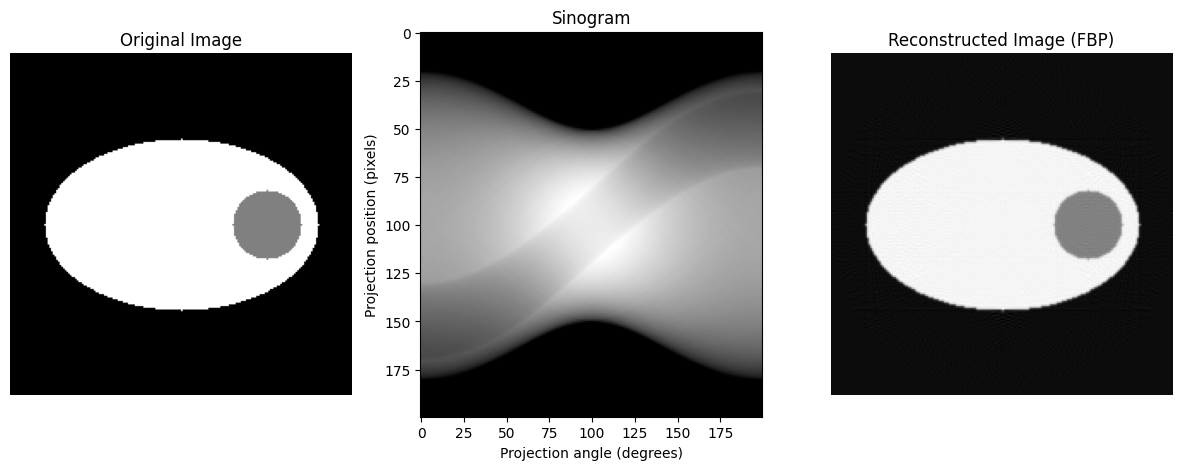

Figure 39: Computation of the sinogram of a cross-section and reconstruction of the original image.

In [ ]:
image_path = '/content/drive/MyDrive/PIM/Images/Sinogram-reconstruction.png'
display(Image(filename=image_path, width=800))
caption = '<p style="text-align: left;">Figure 39: Computation of the sinogram of a cross-section and reconstruction of the original image.</p>'
display({'text/html': caption}, raw=True)

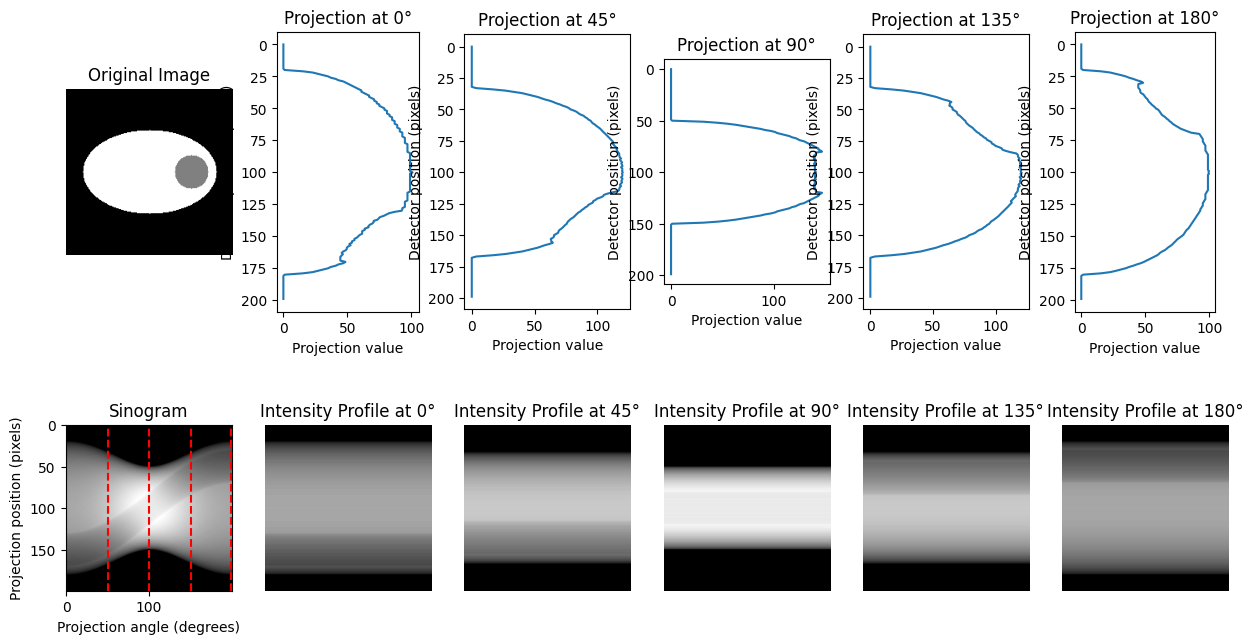

Figure 40: Projections at different angles (sinogram) and reconstruction of the original image.

In [ ]:
image_path = '/content/drive/MyDrive/PIM/Images/Sinogram-projections.png'
display(Image(filename=image_path, width=800))
caption = '<p style="text-align: left;">Figure 40: Projections at different angles (sinogram) and reconstruction of the original image.</p>'
display({'text/html': caption}, raw=True)

### 3.5. Image analysis and artifacts

CT images are characterized by the following aspects:

* CT images offer **high spatial resolution**, allowing to differentiate between small structures in the body. This comes at the cost of **increased radiation dose**. Adaptive filtering and iterative **reconstruction algorithms** to **balance** spatial resolution with dose reduction.

* **Contrast and resolution are lower than MRI**, making it **less effective for** differentiating between **soft tissues**. However, the use of contrast agents can improve visibility of blood vessels, tumors, and other structures.

* The **thickness of the slices** in a CT scan can be **adjusted** depending on the diagnostic needs, with **thinner slices** providing **better detail** for 3D reconstructions, but **resulting in larger data sets and longer processing times**.

* The **Field of View (FOV)** in a CT scan can be **adjusted** to focus on specific areas of interest, optimizing the scan for particular diagnostic purposes. A smaller FOV offers higher resolution in a specific area but might exclude surrounding regions.

<div style="display: flex; justify-content: center; align-items: center;">
    <div style="text-align: center;">
        <img src="https://prod-images-static.radiopaedia.org/images/12031934/221e9770756277cc9dca22a942cf5a_big_gallery.jpeg" alt="Caption" width="200">
        <p>a) axial view</p>
    </div>
    <div style="text-align: center; margin-left: 10px;">
        <img src="https://prod-images-static.radiopaedia.org/images/12032183/00fe453975c1ca1317ce03082db332_big_gallery.jpeg" alt="Caption" width="200">
        <p>b) coronal view</p>
    </div>
    <div style="text-align: center; margin-left: 10px;">
        <img src="https://prod-images-static.radiopaedia.org/images/12032475/9949684a1e0f35b6981a7c6fe34801_big_gallery.jpeg" alt="Caption" width="200">
        <p>c) sagittal view</p>
    </div>
</div>
<p style="text-align: center;">Figure 41: CT slices of a normal brain for the three anatomical planes: a) axial, b) coronal, c) sagittal. Case courtesy of Frank Gaillard, <a href="https://radiopaedia.org/?lang=us">Radiopaedia.org</a>. From the case <a href="https://radiopaedia.org/cases/35508?lang=us">rID: 35508</a></p>

#### **Image artifacts**

Artifacts in CT images are distortions or errors in the imaging data that appear from a variety of sources and can manifest in different ways [3]:

* **Partial volume effects** occur when there are **high contrast differences** within an object, leading to **blurred edges**. Higher sampling rates and slower speed motion often decrease their effect.

* **Ring artifacts** are caused by **detector failures**, and are shown as **circular shapes** in the image.

* **Noise artifacts** cause **grainy images** as a result of **scattering** in the patient and at the detector, resulting in a **low signal-to-noise ratio**. Increasing tube current and voltage can reduce noise.

* **Motion artifacts** are caused by **patient movement** (breathing, heartbeat, ...) during the acquisition of a single slice. The image appears as **blurs**. These can be minimized with shorter acquisition times or corrected with algorithms.

* **Beam hardening artifacts**: **denser areas** (like bones) cause **streaks** or dark bands in the image. This can be minimized through calibration and correction algorithms.

* **Metal artifacts** are generally caused by **high attenuation materials** like metallic objects within the body, such as dental fillings or hip prostheses, leading to dark streaks or **lines coming out from the object**, often making the images non-diagnostic [4].

<img src="https://prod-images-static.radiopaedia.org/images/6170636/d877f38755ac3a11e0c4499319e9dc_big_gallery.jpg" alt="Caption" width="400"><p style="text-align: center;">Figure 42: Metal artirfact in axial CT scan of the head. Source: <a href="https://radiopaedia.org/articles/ct-artifacts">Radiopaedia.</a></p>

[3]: https://www.openaccessjournals.com/articles/ct-artifacts-causes-and-reduction-techniques.html

[4]: https://www.aapm.org/GrandChallenge/CT-MAR/

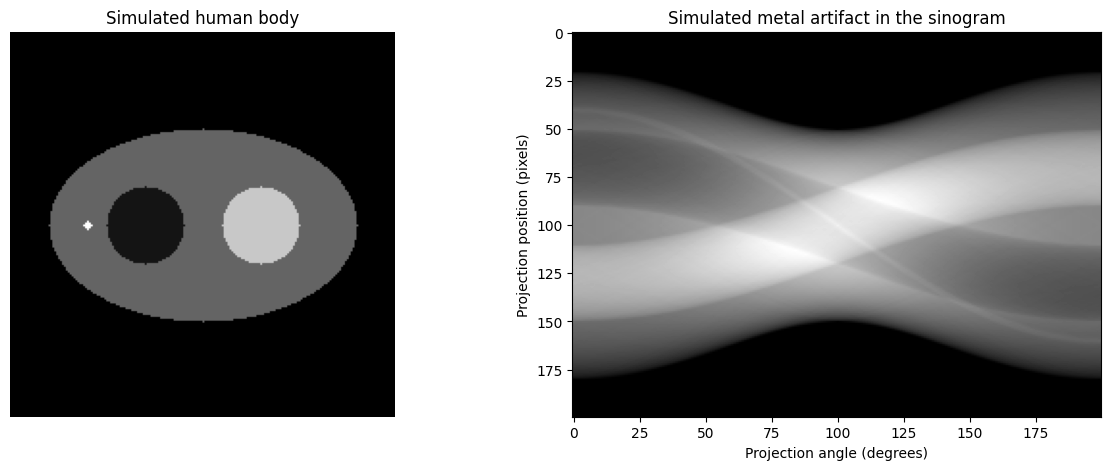

Figure 43: Simulation of metal artifact in the sinogram.

In [ ]:
image_path = '/content/drive/MyDrive/PIM/Images/Sinogram-metal_artifact.png'
display(Image(filename=image_path, width=800))
caption = '<p style="text-align: left;">Figure 43: Simulation of metal artifact in the sinogram.</p>'
display({'text/html': caption}, raw=True)

## 4.- Magnetic Resonance Imaging (MRI)

### 4.1. Introduction to MRI

Magnetic Resonance Imaging (MRI) is a **non-invasive** imaging technique used in medicine to produce **detailed images** of the body's internal structures.

Unlike X-rays or CT scans, MRI **does not use ionizing radiation**. Instead, it utilizes **strong magnetic fields and radiofrequency waves** to generate images of organs, tissues, and other internal features.

MRI is particularly useful for its **ability to differentiate between soft tissues**, allowing for the diagnosis and monitoring of a variety of conditions.

<img src="https://prod-images-static.radiopaedia.org/images/3892/250f2c53630e8ed64750391d0ae46f_big_gallery.jpeg" alt="Caption" width="400"><p style="text-align: center;">Figure 44: Normal midline brain MRI. Source: <a href="https://radiopaedia.org/articles/mri-2?lang=us">Radiopaedia.org.</a></p>

It has become an important tool for **tumor assessment**, being able to provide important data (size, location, relationship with adjacent tissues) from several views (anatomical, physiological, molecular) with high spatial and temporal resolution.

**Applications** in medicine include commonly [1]:

* neurology: brain imaging for detection of tumors, strokes, multiple sclerosis, ...
* cardiology: for assessing the function of the heart and vascular imaging
* oncology: tumor detection and monitoring
* abdominal and pelvic imaging (liver, pancreas, kidneys, prostate, ...)
* specialized imaging of the brain (fMRI, dMRI, MRA, ...)


#### **Safety and limitations**

MRI does not use ionizing radiation and the electromagnetic fields have not been proven to damage tissue, so it is considered **safe** for the human body.

However, the strong magnetic fields involved can **affect ferromagnetic materials** in the body, such as cardiac pacemakers, and may exclude exclude some patients from undergoing an MRI examination safely.

Additionally, MRI scans may be perceived uncomfortable for some patientes due to their duration (often lasting around 30 - 60 minutes, or even longer for more advance scans) in an enclosed space, and the loud noise generated by the magnets and coils.

### 4.2. Magnetic resonance

#### **Dipoles in hydrogen atoms**

In the **human body**, water molecules contain oxygen and **hydrogen atoms**. The **protons** of the hydrogen atoms have a positive charge and **spin** around their axis, creating a **magnetic field** with a positive and negative pole, functioning like tiny magnets.

In **tissues**, the orientation of the dipoles is random, resulting in **no net magnetism**. However, when a **strong external magnetic field** is applied, **protons align** either parallel or antiparallel to the magnetic field direction (*longitudinal magnetization*).

A slightly greater number of protons align **parallel** to the magnetic field, creating a **net magnetization vector** along the axis of the magnetic field.

This alignment is not perfect, and the protons exhibit a **rotational movement** around their axis known as **precession** (caused by the magnetic moment of protons (due to their spin) in an external magnetic field).

#### **Precession Frequency and Larmor Equation**

The **frequency** of this precession depends on the strength of the applied **magnetic field** and can be expressed using the **Larmor equation**:

$$f_0 = \gamma \cdot B_0$$

where:

* $f_0$  is the precession frequency,
* $\gamma$  is the gyromagnetic ratio, a constant specific to each element,
* $B_0$  is the applied magnetic field strength.

For example, the gyromagnetic ratio ($\gamma$) for a hydrogen nucleus (proton) is approximately 42.6 MHz/T (megahertz per tesla). For a magnetic field of 1.5 T (a common used magnetic field strength in MRI scans), the Larmor frequency for a hydrogen nucleus can be calculated as:

$$f_0 = 42.6 \text{ MHz/T} \times 1.5 \text{ T} = 63.9 \text{ MHz}$$

which results in 63.9 MHz. This frequency corresponds to the radiofrequency (RF) range of the electromagnetic spectrum.

#### **Spin Echo Sequence**

When a **90º radiofrequency (RF) pulse** is applied, it affects the **orientation of the protons**.

The **net magnetization vector**, **initially aligned** with the static magnetic field $B_0$ along the z-axis, **is rotated 90º** into the transverse plane (xy-plane), **perpendicular** to $B_0$.

This **eliminates the longitudinal magnetization**, and the collective magnetic moments of the protons now have a component in the transverse plane, **generating transverse magnetization**. At this point, the protons precess in phase (**synchronization of the transverse magnetization**).

#### **Recovery and Signal Detection**

After a period of time, the **RF signal stops**, and **protons recover their natural orientation** (relaxation).

During the recovery process, the **longitudinal magnetization** increases, and the **transverse magnetization** decreases as the protons **desynchronize** their precession movement.

This variation in magnetization, known as **free induction decay (FID)**, **releases energy** emitted an electromagnetic RF wave.

<img src="https://merritt.biochem.med.ufl.edu/files/2022/03/MRI-explanation.jpg" alt="Caption" width="600"><p style="text-align: center;">Figure 45: Alignment/disalignment of protons during an MRI scan sequence. Source: <a href="https://merritt.biochem.med.ufl.edu/about-mri/">The Merritt Laboratory, Department of Biochemistry and Molecular Biology, College of Medicine, University of Florida.</a></p>

#### **T1 and T2 Relaxation Times**

The **recovery of longitudinal magnetization** and **decay of transverse magnetization** occur rapidly and exponentially:

* The time required to recover 63% of the original longitudinal magnetization is called the **T1** time (**longitudinal relaxation time**).

* The time at which 63% of the transverse magnetization is lost is called the **T2** time (**transverse relaxation time**).

<img src="https://www.researchgate.net/profile/Simone-Bosshard/publication/281727332/figure/fig1/AS:363594660237312@1463699130389/1-Relaxation-rates-of-longitudinal-magnetization-1-T1-and-transverse-magnetization.png" alt="Caption" width="600"><p style="text-align: center;">Figure 46: Recovery of longitudinal magnetization (T1) and decay of transverse magnetization (T2). Source: <a href="https://www.researchgate.net/figure/1-Relaxation-rates-of-longitudinal-magnetization-1-T1-and-transverse-magnetization_fig1_281727332">ResearchGate.</a></p>

These **T1 and T2 relaxation times** for a proton vary depending on the molecular environment, so they are **unique to each tissue type**.

In water, both T1 and T2 are significantly longer (in the order of seconds) than in most biological tissues (usually in the range of miliseconds).

Additionally, an **unwanted effect** causes the signal to decay faster than T2 relaxation. This happens because the static $B_0$ magnetic field is assumed to be uniform across the imaging area, but even small variations in the field cause the **spins to dephase more quickly**.

The **signal decay** due to these **magnetic field inhomogeneities** is exponential and is characterized by a constant called **T2\***. The effects of the T2\* constant are shown in MRI images as **dark areas** where the magnetic field is distorted.

#### **Spin Echo Imaging**

To counteract the effects of T2\*, a **180º RF pulse** is applied, which **induces the protons to precess in the opposite direction**.

This helps **temporarily resynchronize the phase** of the desynchronized protons. This re-synchronization **releases energy** as an electromagnetic wave, or **echo**, at a specific time known as TE (_time to echo_).

**The MRI scanner detects this echo and uses it to generate the MRI image**.

**Multiple 180º RF pulses** can be applied, producing progressively **weaker echoes** as energy is lost, until the **synchronization is completely lost**.

At this point, **another 90º RF pulse is applied**, and the **spin echo sequence begins again**. The time between successive 90º RF pulses is known as TR (_time to repetition_).

<img src="https://mrimaster.com/wp-content/uploads/2024/06/TR-and-TE-of-spin-echo-sequence.jpg" alt="Caption" width="600"><p style="text-align: center;">Figure 47: TE (time to echo) and TR (time to repetition) of spin echo sequence. Source: <a href="https://mrimaster.com/tr-and-te-in-mri/">mrimaster.com.</a></p>

### 4.3. MR imaging

#### **Tissue contrast**

The fact that T1 and T2 are different and specific to each tissue allows to **create images with high contrast between different types of tissues**.

In addition, by **adjusting** the MRI scanner's **settings** (duration of TR and TE), **images can be “weighted” to highlight differences** in either T1 or T2 relaxation times, resulting in T1-weighted or T2-weighted images.

**Each type** of image **emphasizes different aspects** of the tissue, providing **complementary information**.

* **T1-weighted** images **highlight** tissues with **shorter T1 times** (e.g., fat, white matter, blood), making them appear **brighter**, while tissues with long T1 times appear darker (fluids, air, dense structures (bones).

  Shorter T1 times means that tissues **recover faster** their longitudinal magnetization, so they emit a **stronger signal** (brighter).

* **T2-weighted** images **highlight** tissues with **longer T2 times** (e.g., CSF (cerebrospinal fluid), gray matter), making them appear **lighter** (**retain** the transverse magnetization longer, so they emit a **stronger signal**). Tissues with shorter T2 times appear dark (fat, white matter, bones and dense structures).



#### **Spatial localization**

When an RF pulse is applied in MRI, **the resulting signal** (FID or spin-echo) reflects the sum of all spin responses from the tissue but **lacks spatial information**. To decode this spatial information, **three additional field gradients are required**.

For that, a coordinate system is defined, with the z-axis aligned with the main magnetic field (slices are taken in the axial plane, parallel to the xy-plane).

<img src="https://mri-q.com/uploads/3/4/5/7/34572113/8393742_orig.gif" alt="Caption" width="500"><p style="text-align: center;">Figure 48: Gradient fields applied to obtain spatial information in MR images. Source: <a href="https://mri-q.com/gradient-advanced.html">mri-q.com.</a></p>

1. Slice selection:

  **To select a transverse slice** in MRI, an additional magnetic gradient field is applied along the **z-axis**, causing the magnetic field to vary in that direction.
  
  This variation leads to **different frequencies for protons depending on their location**. By adjusting the RF pulse frequency, **signals from specific transverse slices can be excited**.

2. Frequency encoding:

  For **frequency encoding** in MRI, a second gradient field, perpendicular to the slice selection field, is applied along the **x-axis**, allowing the determination of signal positions in the x-direction, corresponding to **image columns**.
  
  **Each frequency corresponds to a specific x-location**, and the signal can be reconstructed using a Fourier transform.

3. Phase encoding:

  A third encoding gradient (in phase) is applied along the **y-axis**, perpendicular to both the slice selection and frequency encoding gradients. This gradient causes frequency variations, leading to **phase differences between different y-locations**.
  
  These phase shifts allows **each y-position to have a unique phase while each x-position has a unique frequency**. Fourier analysis is then used to distinguish the amplitude at different x-locations.

**By combining the spatial, frequency and phase information, the MRI system reconstruct the final 2D image of the selected slice.**

**Each pixel in this image corresponds to a specific location within the slice and represents the signal intensity at that location, which reflects the tissue properties.**

The process is **repeated** with different slice selection gradients to acquire images from **different cross-sections** of the body. This allows for the creation of a **complete 3D dataset of the scanned area**, which can be viewed as **individual slices** or reconstructed into a **3D model**.

### 4.4. Parts of an MR system

An MRI scanner is formed by the following elements:

* **Superconducting magnets**: made from niobium-titanium or niobium-tin alloys and cooled by liquid helium to very low temperatures (~10 K). These magnets have **no resistance**, allowing for **high currents** and **strong magnetic fields** (1.0 to 7.0 Tesla in clinical use).

* **Gradient fields coils**: pairs of coils generate the **gradient fields with opposite polarities**. One coil increases the static magnetic field while the other decreases it, creating a **linear change** along the axis of the gradient.

* **RF system**: includes both the **transmission and receiver** system. RF signals require **shielding** from external signals, with good signal-to-noise ratio (SNR).

<img src="https://my.clevelandclinic.org/-/scassets/images/org/health/articles/4876-mri" alt="Caption" width="500"><p style="text-align: center;">Figure 49: Main types of MRI scanners: closed bore (up) and open bore (down). Source: <a href="https://my.clevelandclinic.org/health/diagnostics/4876-magnetic-resonance-imaging-mri">Cleveland Clinic.</a></p>





### 4.5. Image analysis

MR images typically have a **slice thickness** of around 1 mm with **pixel size** of < 1mm and 256 x 256 voxels for head scans, while body MR images usually have 512 x 512 voxels per slice.

**Data acquisition** takes longer compared to CT, as 256 lines must be measured to reconstruct a 256 x 256 image, requiring 256 separate measurements.

With T1-time constants around 1s, repetition times are several seconds, leading to data acquisition times of 15 minutes per image. If **image size** or the **number of measurements** increases, acquisition time can extend to 30-60 minutes or even more.

As for **image quality**, MRI offers high soft tissue contrast and resolution. However, it typically offers lower spatial resolution than radiography or CT for bony structures, and higher resolution than ultrasound or nuclear imaging.

<div style="display: flex; justify-content: center; align-items: center;">
    <div style="text-align: center;">
        <img src="https://prod-images-static.radiopaedia.org/images/17419588/2238918580d968a3bb7310b2995b61_big_gallery.jpeg" alt="Caption" width="200">
        <p>a) axial view</p>
    </div>
    <div style="text-align: center; margin-left: 10px;">
        <img src="https://prod-images-static.radiopaedia.org/images/17419213/0ea7fe3147e9ba8147909cac6094d0_big_gallery.jpeg" alt="Caption" width="200">
        <p>b) coronal view</p>
    </div>
    <div style="text-align: center; margin-left: 10px;">
        <img src="https://prod-images-static.radiopaedia.org/images/17420073/b84d4978c1365fd34a92339865a8f9_big_gallery.jpeg" alt="Caption" width="200">
        <p>c) sagittal view</p>
    </div>
</div>
<p style="text-align: center;">Figure 50: MRI slices of a normal brain for the three anatomical planes: a) axial, b) coronal, c) sagittal. Case courtesy of Bruno Di Muzio, <a href="https://radiopaedia.org/?lang=us">Radiopaedia.org</a>. From the case <a href="https://radiopaedia.org/cases/41113?lang=us">rID: 41113</a></p>












#### **Artifacts in MR imaging**

Artifacts in MRI can impact the quality and diagnostic accuracy of the images. Some common types are:

* **Aliasing artifacts** occur when the field of view (FOV) is smaller than the object being imaged, causing structures outside the FOV to appear on the **opposite side of the image**. Enlarging the FOV or using digital filters can compensate for this.

* **Chemical shift artifacts** happen when tissues with different resonance frequencies, like fat, are mistaken for water, causing **spatial translation errors**.

* **Motion artifacts** result from movement during scanning, leading to incorrect phase accumulation. Both cardiac and breathing movements can cause this type of artifacts.

* **Edge artifacts** appear at **boundaries between tissues** with differing signals.

* **Field inhomogeneity**, particularly at the FOV borders, can **distort images**, and non-ferromagnetic implants may cause complete **image extinction** around them.

<div style="display: flex; justify-content: center; align-items: center;">
    <div style="text-align: center;">
        <img src="https://prod-images-static.radiopaedia.org/images/1654117/80507d388bb2c85b2129a30c91af20_big_gallery.jpeg" alt="Caption" width="200">
        <p>a) MRI brain image with aliasing</p>
    </div>
    <div style="text-align: center; margin-left: 10px;">
        <img src="https://prod-images-static.radiopaedia.org/images/1654124/8927b717f0a079c051d69a5e0e3846_big_gallery.jpeg" alt="Caption" width="200">
        <p>b) MRI image with aliasing corrected</p>
    </div>
</div>
<p style="text-align: center;">Figure 51: Top: aliasing in MRI image (wrap-around with the back of the head projected over the front due to small FOV). Bottom: oversampling eliminates the aliasing artifact. Source: <a href="https://radiopaedia.org/articles/aliasing-on-mri?lang=us">Radiopaedia.com.</a></p>

### 4.6. Specific MRI Imaging Techniques

MRI has evolved to include several modalities, each designed to **highlight different aspects of the body's structure and function**. The most common are:

* **Diffusion Tensor Imaging (DTI / DT-MRI)**: maps the diffusion of water molecules in white matter tissue (used in brain imaging for **orientation of tracts of nerve fibers**).

* **Magnetic Resonance Angiography (MRA)**: visualizes blood vessels using MRI, and it is used for non-invasive **imaging of arteries and veins**.

* **Functional MRI (fMRI)**: measures brain activity by detecting changes in blood flow (oxygen). It is used in neuroscience research to understand **cognitive functions, sensory processing, and brain networks**.

## 5.- Ultrasound Imaging

### 5.1. Ultrasound Imaging Principles


Ultrasound (US) imaging is a widely used, **noninvasive**, and cost-effective diagnostic technique, which provides **real-time observation of moving structures**, such as the beating heart, blood flow, or fetal movement during pregnancy.

It is based on the **reflection of high-frequency sound waves** (1-20 MHz) to visualize internal body structures.

These sound waves are generated by a **piezoelectric transducer**, which converts electrical pulses into acoustic signals through the inverse **piezoelectric effect**. This same transducer then **receives the reflected sound waves (echoes)** and converts them back into electrical signals using the direct piezoelectric effect.

Ultrasound imaging does not use ionizing radiation, and is its **safe for tissues**, as long as sound pressure and intensity remain below certain thresholds, which is usual for normal examination times.

The only potential risk is thermal damage to tissue at a microscopic level caused by the **conversion of sound wave energy into heat**.

<img src="https://www.nibib.nih.gov/sites/default/files/inline-images/Ultrasound_Terese%20Winslow.jpg" alt="Caption" width="400"><p style="text-align: center;">Figure 52: Ultrasound scanning. Source: <a href="https://www.nibib.nih.gov/science-education/science-topics/ultrasound">www.nibib.nih.gov.</a></p>

<img src="https://marketing.webassets.siemens-healthineers.com/1800000002013829/5bcc0d2b861b/v/463e3906f17f/ACUSON-P500-FROSK-Portable-Ultrasound_1800000002013829.jpg" alt="Caption" width="400"><p style="text-align: center;">Figure 53: Portable ultrasound scanner. Source: <a href="https://www.siemens-healthineers.com/es/ultrasound/ultrasound-point-of-care/acuson-p500-ultrasound-machine">Siemens Healthineers.</a></p>


### 5.2. Sound Propagation and Interaction with Tissue


Sound is a longitudinal **pressure wave** that propagates through a medium by compressing and decompressing it. The speed of sound within a medium depends on its compressibility and density, with an **average speed** of approximately **1540 m/s in soft tissue**.

However, this **speed varies** in different tissues, fluids or organs, such as bone (3000-4000 m/s), water (1490 m/s), blood (\~1570 m/s), muscle (\~1580 m/s), and air (340 m/s).

As the ultrasound waves pass through the body, they encounter various **tissue boundaries**. At these boundaries, the waves may undergo different ultrasonic phenomena:

* **Absorption** refers to the conversion of the sound wave's mechanical energy into heat energy in tissues, and is the primary mechanism by which **attenuation** occurs

* **Reflection** occurs at interfaces between materials with different acoustic impedances, where part of the wave is **bounced back** to the transducer.

* **Refraction** is the **change in direcction** that occurs at large structures relative to the wavelength, leading to positional inaccuracies in the image.

* **Scattering** happens when the wave encounters structures similar in size to its wavelength, causing the wave to be **dispersed in multiple directions** isotropically.

* **Diffraction** occurs when sound waves pass through small openings or narrow structures. Its effect is less pronounced compared to other phenomena.

The intensity of the pulses (after reflection, refraction or scattering) depends on the acoustic impedance differences and the angle of incidence at the boundary.

<img src="https://radiologykey.com/wp-content/uploads/2020/07/10-1055-b-002-76310_c007_f001.jpg" alt="Caption" width="500"><p style="text-align: center;">Figure 54: Reflection, refraction and scattering of ultrasound waves at boundaries. Source: <a href="https://radiologykey.com/7-ultrasonography/">ResearchGate.</a></p>

### 5.3. Attenuation and Resolution

The **depth of penetration** of ultrasound waves is **limited by attenuation**, which causes the wave's intensity to **decrease exponentially** as it travels deeper into the tissue.

**Different tissues** attenuate ultrasound waves at **different rates**, ranging from **low** attenuation (water), intermediate (muscle, organs), to **high** (bone and lungs).

**High frequencies** offer **better resolution** to detect **smaller structures** than low frequency waves; however high frequency waves **attenuate faster** and have **lower penetration depth**. Thus, lower frequencies are usually used for deeper imaging and higher frequencies for more detailed, superficial imaging.

The **time** it takes for these **echoes** to return allows the system to calculate the **distance** to the tissue boundaries and create an **image**.

The **deeper** the structure is located, the **longer** the travel time, the **more** the absorption, and the **weaker** the signal it reflects.

The **shape** of the probe (linear, curved) is usually related to the frequency and the structures it is intended to image.

For this purpose, there exist **transducers with different frequency ranges and forms**, depending on the application.

<div style="display: flex; justify-content: center; align-items: center;">
    <div style="text-align: center;">
        <img src="https://radiologykey.com/wp-content/uploads/2021/05/C14-FF12.gif" alt="Caption" width="300">
        <p></p>
    </div>
    <div style="text-align: center; margin-left: 10px;">
        <img src="https://radiologykey.com/wp-content/uploads/2021/05/C14-FF13.gif" alt="Caption" width="300">
        <p></p>
    </div>
</div>
<p style="text-align: center;">Figure 55: Linear (top) and curved (bottom) ultrasound probes. Source: <a href="https://radiologykey.com/7-ultrasonography/">RadiologyKey.com</a></p>



### 5.4. Ultrasound Imaging Techniques


Ultrasound imaging has evolved over the years, offering various modes:

*	**A-Mode**: this is the simplest ultrasound technique, where a **single pulse** of ultrasound is sent into the body, and the amplitude of the reflected echoes are recorded as a function of time. It provides **one-dimensional information** about the depth of tissues.

*	**B-Mode**: is considered the _standard_ mode. This mode (*Brightness*) **converts echo amplitudes into shades of gray** to form a **2D image** of the internal structures of the body.

* **M-mode**: is used to assess the movement of chambers and valves throughout the cardiac cycle.

* **3D Ultrasound**: 3D imaging is achieved using 2D transducer arrays to emit and receive sound waves from **multiple directions** (angles). These techniques allow for the reconstruction of three-dimensional images of internal structures.


**Doppler Ultrasound**

The Doppler effect is used in ultrasound imaging to measure the **velocity and direction of blood flow**. The frequency of sound waves **shifts** depending on if blood is moving towards or away the transducer.

This frequency shift is used to create a **visual representation** of blood flow, with flow towards the transducer typically displayed in **red** (positive shift) and flow away in **blue** (negative shift). Lighter shades of each color denote higher velocities.

### 5.5. Ultrasound image analysis and artifacts


In **B-mode** imaging, images are displayed in shades of gray, where **the brightness of each pixel corresponds to the amplitude of the reflected sound wave**.

**Denser** or more reflective tissues, like bones, appear **brighter** (white), while less reflective tissues, such as fluid-filled areas, appear darker (black).

In addition, different tissues have **characteristic textures** in ultrasound images, which can help in identifying and differentiating them.

The **spatial resolution degrades with depth**, and also **depends on the frequency** of the ultrasound probe and the imaging technique used.

Compared to other techniques, the **resolution is moderate**, lower than CT, MRI or X-ray, and better than nuclear imaging techniques.

<img src="https://prod-images-static.radiopaedia.org/images/13638622/10b5e4be645d81fb7701e8a0771732_big_gallery.jpg" alt="Caption" width="400"><p style="text-align: center;">Figure 56: Normal pancreas ultrasound image. Case courtesy of Matt A. Morgan, <a href="https://radiopaedia.org/?lang=us">Radiopaedia.org</a>. From the case <a href="https://radiopaedia.org/cases/37581?lang=us">rID: 37581</a></p>

#### **Ultrasound Imaging Artifacts**


Several factors can cause artifacts in ultrasound images, impacting the quality and accuracy of the imaging:

* **Speckle noise** is a **grainy texture** that appears due to interference patterns caused by the scattering of ultrasound waves as they reflect small structures within the tissue. This noise can make it difficult to distinguish speckle from the actual texture of soft tissue.

*	**Speed displacement artifact**: ultrasound imaging assumes a constant speed of sound (1540 m/s), which can lead to **signal displacement and inaccurate depth measurement** if the true propagation velocity of a tissue is below or above 1540 m/s.

* **Refraction artifacts** happen when an ultrasound pulse hits a tissue interface at an **angle**. Differences in how fast sound travels through the tissues can cause refraction of the waves.

* **Reverberation artifacts** occur when an ultrasound beam **bounces back and forth** between two surfaces, creating multiple echoes. These echoes appear as parallel lines on the image, making it look like if they were coming from **deeper structures** because it takes longer for the sound waves to return.

* **Mirror artifact**: a mirror artifact occurs when the primary ultrasound beam **reflects off a surface** (e.g. diaphragm), encounters another structure, and then **reflects back** to the original surface before returning to the transducer. It appears as if the **delayed echoes** were coming from a deeper structure, creating a **mirror image**.

* **Acoustic shadowing** is an ultrasound artifact that occurs when ultrasound waves hit a structure with high acoustic impedance, like bone or a stone. The waves are either reflected back or absorbed, creating a **dark area behind the structure where no signal is received**.

Post-processing techniques can partially address these artifacts. However, they are often nonlinear and non-stationary, making complete removal difficult.

<div style="display: flex; justify-content: center; align-items: center;">
    <div style="text-align: center;">
        <img src="https://www.nysora.com/wp-content/uploads/2023/03/3-1536x1056.jpg" alt="Caption" width="400">
        <p>a) Reverberation artifact</p>
    </div>
    <div style="text-align: center; margin-left: 10px;">
        <img src="https://www.nysora.com/wp-content/uploads/2023/03/6-1080x657.jpg" alt="Caption" width="400">
        <p>b) Shadowing artifact</p>
    </div>
</div>
<p style="text-align: center;">Figure 57: Ultrasound images with artifacts: a) reverberation, b) shadowing. Source: <a href="https://www.nysora.com/news/ultrasound-image-artifacts-explained/">Nysora.com.</a></p>



## 6.- Nuclear Imaging

### 6.1. Introduction to Nuclear Imaging

Nuclear imaging records **ionizing radiation**, similarly to X-rays. However, whereas in X-rays the radiation is applied from the outside, in nuclear imaging the **patient emits radiation**.

Nuclear imaging works by **introducing a radiotracer** (radioactive tracer) into the body prior to image acquisition and it is **distributed through blood circulation**.

The radiotracer is designed to **accumulate in specific tissues or organs** depending on the type of study, and **emits gamma rays**, which are detected by a special camera (**gamma camera**) to create detailed images of the targeted area.

These images reveal important information about how the body is functioning at the **molecular level**.

Unlike previous imaging techniques which primarily capture the structure of organs and tissues, **nuclear imaging create images that provide functional information**, showing how tissues and organs are functioning based on the distribution of the radiotracer and the **metabolic activity** of the body's internal processes.

The amount of **radiation** used in these procedures is generally **low** and carefully controlled to minimize risk to patients.




#### **Applications of nuclear imaging**

* **Cardiology**: to evaluate blood flow to the heart, assess heart function, and detect coronary artery disease.
* **Oncology**: to identify cancerous tumors, determine the stage of cancer due to increased blood circulation, and monitor the response to treatment.
* **Neurology**: to measure brain activity to diagnose and manage neurological disorders (Alzheimer's disease, epilepsy, Parkinson's disease, etc.).
* **Endocrinology**: to detect abnormalities such as hyperthyroidism or thyroid cancer.

#### **Nuclear imaging techniques**

* **Scintigraphy**: measures the **planar projection** of the distribution of radiotracers, similar to projection of X-ray in radiography.

* **Single Photon Emission Computed Tomography (SPECT)**: provide **3D tomographic images** of how the radiotracer distributes within the body. The 3D images are generated from a large number of **projection images recorded at different angles**. The detectors **record gamma ray emissions** from the radiotracers.

* **Positron Emission Tomography (PET)**: uses a different type of radiotracers. Instead of measuring gamma rays, the detectors **record photons** generated when positrons produced by the radiotracers react with electrons in the body.

<img src="https://kiranpetct.com/wp-content/uploads/2024/04/Understanding-the-Differences_-SPECT-Scan-vs-PET-Scan.png" alt="Caption" width="600"><p style="text-align: center;">Figure 58: PET/SPECT scanners for nuclear medicine. Source: <a href="https://kiranpetct.com/understanding-the-differences-spect-scan-vs-pet-scan/">kiranpetct.com/.</a></p>

### 6.2. **The $\gamma$ camera**

The **gamma camera** is designed to **capture and measure the gamma photons emitted by the radiotracer**. It consists of several components:

* **Collimator**: is a thick lead plate with **cylindrical holes**. The axes of these holes are aligned perpendicular to the scintillator crystal, which is located behind the collimator.

  The function of the collimator is to **ensure that only photons traveling at a perpendicular angle to the detector plane reach the scintillator**.
  
  Photons approaching at other angles are either **reflected or absorbed** by the lead collimator, preventing them from being detected.
  
  This process improve the accuracy and quality of the image by **reducing scattering**, which decrease contrast and increase noise.

* **Scintillator crystal**: **convert gamma photons** that reach the scintillator crystal **into visible light photons**.

* **Photomultiplier tubes**: the visible light photons generated by the scintillator crystal are then captured by photomultiplier tubes, which **amplify the light signal** through the photoelectric effect, **converting the light photons into electrons**.

* **Electronic circuits**: formed by signal amplifiers, analog to digital converters, and positioning circuits which determine the X and Y position and generate the final image.

Gamma cameras can be used as standalone devices for scintigraphy or in combination with a CT scanner in SPECT.

<img src="https://prod-images-static.radiopaedia.org/images/63178023/78504c09569f95dc7776dde62e6641180994efa738d35ad80388f3a30052e05d_big_gallery.jpeg" alt="Caption" width="600"><p style="text-align: center;">Figure 59: Gamma camera structure. Case courtesy of Raymond Chieng, <a href="https://radiopaedia.org/?lang=us">Radiopaedia.org</a>. From the case <a href="https://radiopaedia.org/cases/173797?lang=us">rID: 173797</a></p>

### 6.3. Scintigraphy


Scintigraphy is a minimally invasive imaging technique used in oncology and cardiology to **detect areas of increased or decreased metabolic activity**, which might indicate conditions such as the spread of metastatic cancer or infections.

It involves the use of a radiopharmaceutical or **radiotracer injected into the patient's body**, which contains a radioactive isotope. As this **isotope decays**, it **emits gamma photons**, which are then detected by a _gamma camera_, which is positioned close to the region of the body being studied to create a **two-dimensional image of the distribution of the radiotracer within the body**.

In it, each pixel represents the **activity detected along a straight path from the source of emission to the detector**. The **gray values** of the pixels are **proportional** to the total amount of **attenuated activity** along that path.

The image **reflects the functional activity of the tissues** rather than their structural density. Scintigraphy is often **complementary to the anatomical details** obtained from other imaging modalities like CT or MRI.

Another common application is **bone scintigraphy** or **bone scan**, used to detect abnormalities in the skeletal system, such as fractures, infections, or bone cancer.

<img src="https://radiologykey.com/wp-content/uploads/2022/06/C8-FF1-2.gif" alt="Caption" width="400"><p style="text-align: center;">Figure 60: Normal bone scan. Source: <a href="https://radiologykey.com/bone-scintigraphy/">RadiologyKey.com.</a></p>

### 6.4. Single Photon Emission Computed Tomography (SPECT)

SPECT uses **projection images from rotating gamma cameras to create a 3D image of the radioactive tracer distribution** within the body. Regions that **absorb more tracer** appear **brighter** on the image.

This process is analogous to X-ray computed tomography, where projections are recorded at discrete angles during rotation, and a 3D volume is reconstructed from the projection data.

SPECT imaging is used to assess perfusion (process of blood flow through the body's tissues) in the heart and brain and to detect tumors in the lungs, kidneys, liver, and bones.

Modern SPECT systems with **multiple rotating cameras** allow for the capture of **different projections simultaneously**. The acquisition time for a single projection is approximately 15-20 seconds, resulting in total acquisition times of around 30 minutes.

<img src="https://prod-images-static.radiopaedia.org/images/7643964/7edd231431fd45221925ab252b69d1_big_gallery.jpg" alt="Caption" width="600"><p style="text-align: center;">Figure 61: Normal brain perfusion SPECT. Source: <a href="https://radiopaedia.org/articles/single-photon-emission-computed-tomography-spect">Radiopaedia.org.</a></p>








### 6.5. Positron Emission Tomography (PET)

PET **uses positron emitters as tracers** for producing the image. These tracers are unstable isotopes that decay by converting a proton into a positron, a neutron and a neutrino.

A **positron** is the anti-particle of an electron, with the same mass and positive charge instead. It cannot be detected directly. However, **when a positron meet an electron, they annihilate and produce two photons** (with energy of 511 keV), **emitted in opposite direction**.

In a detector ring, **an event is registered as two photons detected at the same time**, within nanoseconds (_coincidence detection_). The **origin** of the detected event can be localized along a **straigh line connecting the two detection sites** (_line of response_ (LOR)).

For reconstructing the image, **attenuation correction** must be considered. **Photons** traverse  tissue of different thickness, so they **are attenuated differently depending on their path**. The result is a **3D sliced image** which **reveals** no anatomic structures but **metabolic function**.

In comparison with SPECT, PET is more expensive (it requires a cyclotron close to the PET scanner), and provide higher quality images, with similar scan times.



### 6.6. Image analysis and artifacts

Nuclear images are captured as **projection or slice images**, depending on the specific modality.

The **signal strength and contrast** depend on the amount and the characteristics of the **radiotracer** and the **metabolism** of the body.

* **Spatial resolution**: it is influenced by the **gamma camera**, the characteristics of the collimator and the detector crystal, and the image **reconstruction algorithms**.

* **Sensitivity**: measures the **ability of the system to detect radioactivity** and generate an image based on that signal.

  A **more sensitive** system captures more gamma photons, resulting in a **better signal-to-noise ratio and shorter imaging times**, which is always desirable.

There exist a **balance between spatial resolution and sensitivity**, where, if one increases, the other decreases. For example, a collimator with finer holes can enhance spatial resolution but may reduce sensitivity because fewer gamma photons reach the detector.

This **balance is usually adjusted depending on the study**: for specific organs, it may be more important high spatial resolution, whereas for larger areas of the body, higher sensitivity might be prioritized.

Image **resolution and signal-to-noise ratio** of SPECT and scintiography are typically **lower** (7-15 mm) compared to CT or MRI, due to the low number of photons recorded. In the case of scintigraphy, the resolution is further reduced by the the **loss of depth information**.

Modern systems can **improve spatial resolution by combining PET/SPECT with CT** (PET/CT and SPECT/CT) to include anatomical information in addition to functional imaging.

PET provides **higher sensitivity and spatial resolution** (4-8 mm) than SPECT and scintigraphy, mainly due to the coincidence detection of photons (which reduces noise) and more sophisticated detection algorithms to generate the image, but still **lower than other imaging techniques**.

<img src="https://healthcare-in-europe.com/media/story_section_image/2911/image-01-kuwert-spect-ct-image.jpg" alt="Caption" width="600"><p style="text-align: center;">Figure 62: CT image (left) combined with SPECT (right): the result is an SPECT/CT image (center). The bright spot reveals a benign tumour. Source: <a href="https://healthcare-in-europe.com/en/news/spect-ct-versus-pet-ct-the-little-sister.html">healthcare-in-europe.com</a></p>


#### **Artifacts in nuclear imaging**


**Causes of artifacts** in nuclear imaging can be due to the **equipment** (cameras) or the **imaging and reconstruction process**:

* **Scattering**: due to scatterd photons, scattering **decreases contrast** in the image and may cause **artifacts**. Scattered photons may be removed by frequency ﬁltering.

* **Noise**: due to the scattered photons or to the reconstruction algorithm.

* **Patient motion**: SPECT and PET are more subject because of the **longer acquisition times**. In these cases, images appear **blurred**.

## References

* Chityala, Ravishankar, _Image Processing and Acquisition Using Python: Chapters 13 (X-Ray and Computed Tomography) and 14 (Magnetic Resonance Imaging)_. Chapman and Hall/CRC, 2022. 9780367531577

* Toennies, Klaus D., _Guide to Medical Image Analysis - Methods and Algorithms: Chapter 2 (Digital Image Acquisition)_. Springer, 2017. 9781447174035

* Birkfellner, Wolfgang, _Applied Medical Image Processing - A Basic Course: Chapter 1: A Few Basics of Medical Image Sources_. CRC Press, 2014. 9781466555570

* Suetens, Paul. _Fundamentals of Medical Imaging_. Cambridge University Press, 2009. 9780521519151



